In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit as cf
from matplotlib.colors import LinearSegmentedColormap as LSC
from matplotlib.colors import LogNorm
import swiftascmaps as swift
import seaborn as sns
from healpy.newvisufunc import projview, newprojplot
import healpy as hp
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

<h1>Chapter 1</h1>

<h3>Comparison of Dark Matter Profiles</h3>

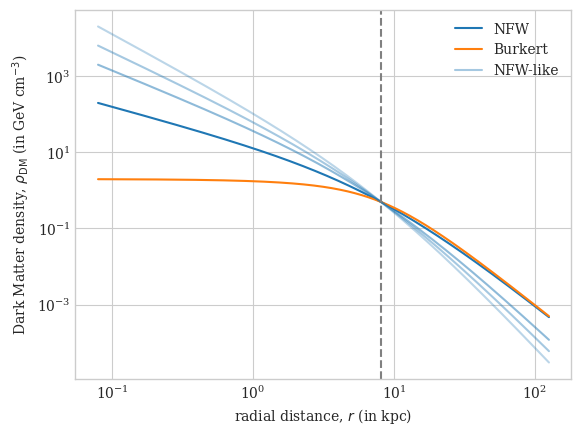

In [2]:
rs = 8.1 # kpc

rho_s = 1.99 # GeV/cm^3

def rho_NFW(r):
    global rs, rho_s
    t1 = (r / rs)
    t2 = ( 1 + (r/rs) )**2

    return rho_s / (t1 * t2)

def rho_n(r, n):
    global rs, rho_s
    t1 = (r / rs)**n
    t2 = ( 1 + (r/rs) )**(2)

    return rho_s / (t1 * t2)

def rho_bur(r):
    global rs, rho_s
    t1 = r + rs
    t2 = (r*r) + (rs*rs)

    return rho_s * rs * rs * rs / (t1 * t2)


rvals = 10 ** np.linspace(-1.1, 2.1, 1000)

with plt.style.context("seaborn-v0_8-whitegrid"):
    plt.rcParams["font.family"] = "serif"
    plt.plot(rvals, rho_NFW(rvals), label = "NFW")
    plt.plot(rvals, rho_bur(rvals), label = "Burkert", color = "C1")
    plt.plot(rvals, rho_n(rvals, 1.5), color = "C0", alpha = 0.5)
    plt.plot(rvals, rho_n(rvals, 1.75), color = "C0", alpha = 0.4, label = "NFW-like")
    plt.plot(rvals, rho_n(rvals, 2), color = "C0", alpha = 0.3)
    plt.axvline(rs, color = "grey", ls = "--")
    
    plt.yscale("log")
    plt.xscale("log")
    plt.xlabel(r"radial distance, $r$ (in kpc)")
    plt.ylabel(r"Dark Matter density, $\rho_{\rm{DM}}$ (in GeV cm$^{-3}$)")
    plt.legend()
plt.show()

<h1>Chapter 2</h1>

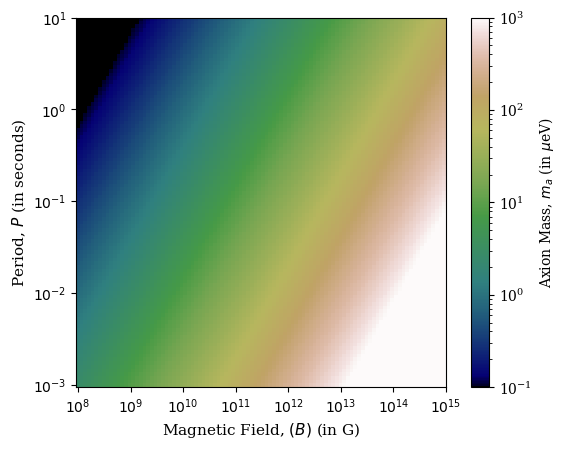

In [3]:
B_field = 10 ** np.linspace(8, 15, 100)
pulse_P = 10 ** np.linspace(-3, 1, 100)

def ma_max(B0, P0):
    return 85 * np.sqrt( (B0 / 1e14) * (1/P0) )

with plt.style.context("default"):
    plt.rcParams["font.family"] = "serif"
    XX, YY = np.meshgrid(B_field, pulse_P)
    
    im = plt.imshow(ma_max(XX, YY), origin = "lower", norm = "log", cmap = "gist_earth", vmax = 1e3, vmin = 0.1, )
    plt.colorbar(im, label = r"Axion Mass, $m_a$ (in $\mu$eV)")

    plt.xticks(np.linspace(0, 99.5, 8), labels = [r"$10^{%d}$" % i for i in np.arange(8, 16, 1)])
    plt.xlabel(r"Magnetic Field, $(B)$ (in G)", fontsize = 11)
    plt.yticks(np.linspace(0, 99.5, 5), labels = [r"$10^{%d}$" % i for i in [-3, -2, -1, 0, 1]])
    plt.ylabel(r"Period, $P$ (in seconds)", fontsize = 11)
    
plt.show()

<h1>Chpater 3</h1> 

<h3>Catalogue Properties</h3>

In [4]:
# Import PsrPopPy Catalogue

f = pd.read_csv("/Users/user/Desktop/Results/Thesis/Chapter 3/Data/output2.dat", 
                sep = "\t", header = 0)

print("Number of columns: ", len(f.columns.tolist()), "\n", "Number of stars: ", 
      len(f.index), "\n\n", f.columns.tolist(), sep = "")

Number of columns: 18
Number of stars: 2012568

['Unnamed: 0', 'Age', 'Array Index', 'B_init (G)', 'Distance (kpc)', 'Galactic Latitude (degrees)', 'Galactic Longitude (degrees)', 'Initial Period (s)', 'Misalignment angle', 'Pdot (s s^-1)', 'Period (ms)', 'Type', 'Vx', 'Vy', 'Vz', 'X (kpc)', 'Y (kpc)', 'Z (kpc)']


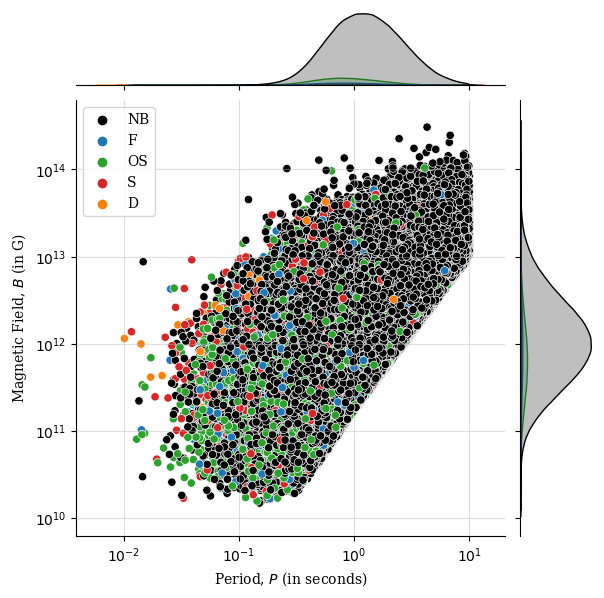

In [5]:
sns.jointplot(data = f, x = np.log10(f["Period (ms)"]/1000), y = np.log10(f["B_init (G)"]), 
              hue = f["Type"], palette = ["black", "C0", "C2", "C3", "C1"])

plt.yticks([10, 11, 12, 13, 14], labels = [r"$10^{%d}$" % i for i in [10, 11, 12, 13, 14]])
plt.ylabel(r"Magnetic Field, $B$ (in G)", fontfamily = "serif")
plt.xlabel(r"Period, $P$ (in seconds)", fontfamily = "serif")
plt.xticks([-2, -1, 0, 1], labels = [r"$10^{%d}$" % i for i in [-2, -1, 0, 1]])
plt.legend(prop={'family': "serif"}, fontsize = 10)
plt.grid(alpha = 0.4)
plt.show()

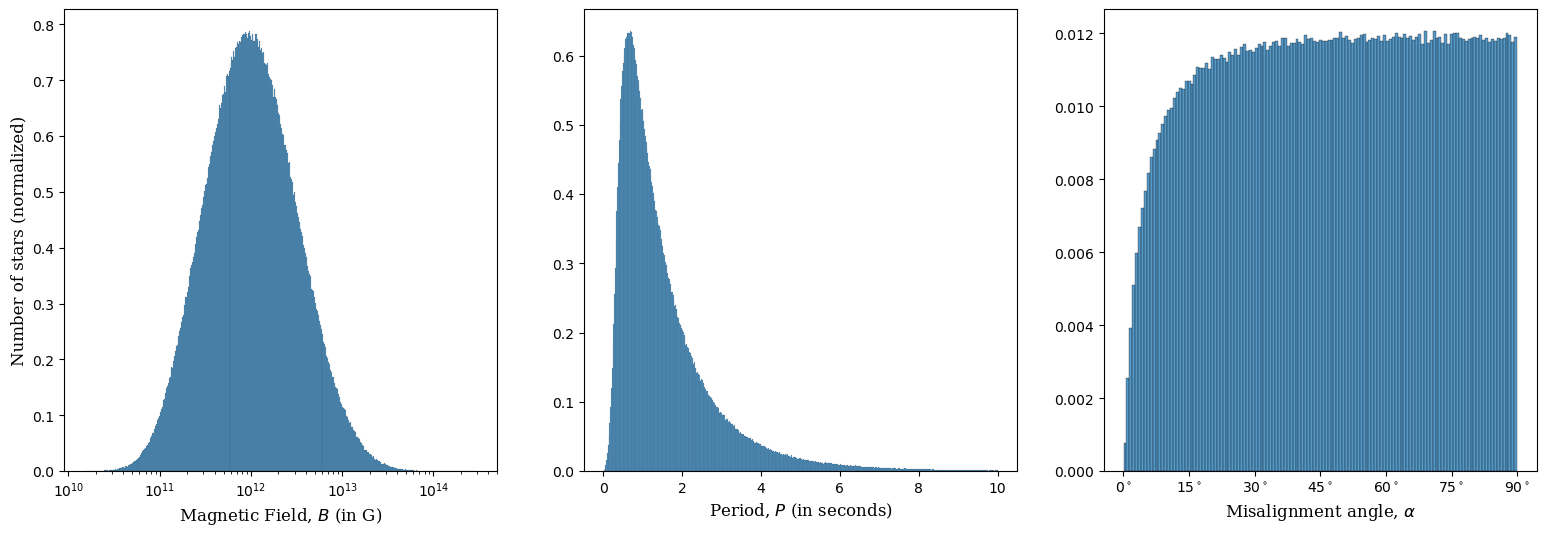

In [6]:
fig =  plt.figure(figsize =(19, 6))

plt.subplot(1,3,1)
sns.histplot(f["B_init (G)"], log_scale = 10, stat = "density")
# sns.histplot(B, log_scale = 10, stat = "density", label = "ATNF")
plt.ylabel("Number of stars (normalized)", fontsize = 12, fontfamily = "serif")
plt.xlabel(r"Magnetic Field, $B$ (in G)", fontsize = 12, fontfamily = "serif")

plt.subplot(1,3,2)
sns.histplot(f["Period (ms)"] / 1000, stat = "density")
plt.xlabel(r"Period, $P$ (in seconds)", fontsize = 12, fontfamily = "serif")
plt.ylabel("")

plt.subplot(1,3,3)
sns.histplot(f["Misalignment angle"], stat = "density")
xticks = np.linspace(0, 90, 7, dtype = int)
plt.xticks(xticks, labels = [i + r"$^\circ$" for i in np.array(xticks, dtype = str)])
plt.xlabel(r"Misalignment angle, $\alpha$", fontsize = 12, fontfamily = "serif")
plt.ylabel("")

plt.show()

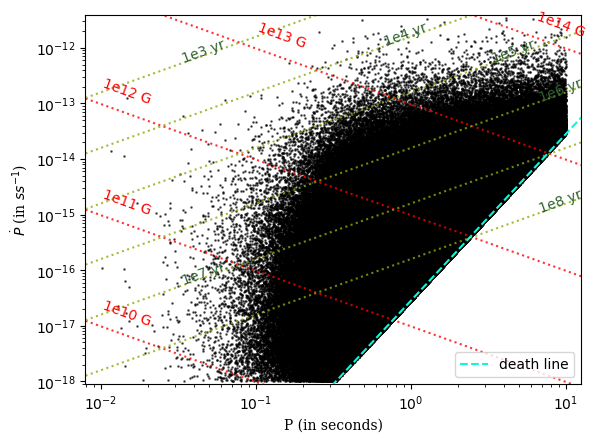

In [7]:
P = f["Period (ms)"]/1000
Pdot = f["Pdot (s s^-1)"]

somef = 3.2 * 1e19
x = np.linspace(10**(-2.3), 10**(1.3), 1000)
Bconst = np.array([1e6, 1e7, 1e8, 1e9, 1e10]) * 1e4 / somef
    # 1e4 for it to be in G and 3.2 factor comes from formula
placeB  = np.array([1e-2, 1e-2, 1e-2, 1e-1, 10**(0.8)])
Aconst = np.array([1e3, 1e4, 1e5, 1e6, 1e7, 1e8]) * 3.154e7
    # convert into seconds
placeA = np.array([10**(0.8), 10**(-1.5), 10**(0.8), 10**(0.5), 10**(-0.2), 10**(-1.5)])

plt.scatter(P, Pdot, s=3, c = "black", marker = ".", alpha = 0.6)

for i in range(Bconst.size):
    plt.plot(x, Bconst[i]*Bconst[i] / x, ls = ":", color = "red", alpha = 0.8)
    plt.annotate("1e"+str(int(np.log10(Bconst[i]*(3.2 * 1e19))))+" G", 
                xy = (placeB[i],  Bconst[i]*Bconst[i] / placeB[i]), 
                xycoords = "data", xytext=(0.5, 0.5), textcoords='offset pixels', 
                color = "red", rotation = -20)
    
for i in range(Aconst.size):
    plt.plot(x, x/(2*Aconst[i]), ls = ":", color = "#8bad0d", alpha = 0.8)
    plt.annotate("1e"+str(int(np.log10(Aconst[i]/ 3.154e7)))+" yr", 
                xy = (placeA[-1*i-1],  placeA[-1*i-1]/(2*Aconst[i])), 
                xycoords = "data", xytext=(1.5, 1.5), textcoords='offset points',
                color = "#30622f", rotation = 20)
    
deathf = ((1.7/3.2) * 1e-8)**2
plt.plot(x, deathf * x * x *x, color = "#0df7db", ls = "--", label = "death line", alpha = 1, zorder = 4)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("P (in seconds)", fontfamily = "serif")
plt.ylabel(r"$\dot P$ (in $s s^{-1}$)", fontfamily = "serif")
plt.xlim(10**(-2.1), 10**(1.1))
plt.ylim(10**(-18.05),10**(-11.4))
plt.legend(loc = 4)
plt.show()

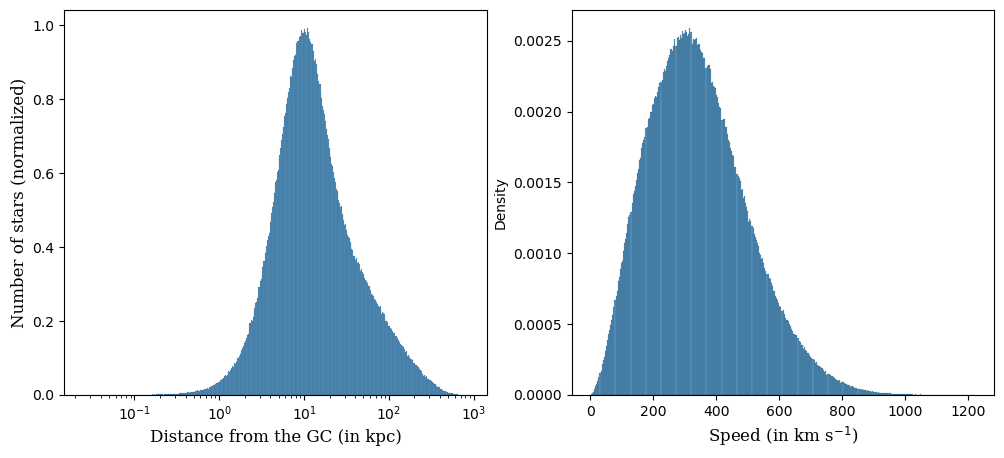

In [8]:
distance_from_GC = np.sqrt( (f["X (kpc)"]**2) + (f["Y (kpc)"]**2) + (f["Z (kpc)"]**2) )
speed = np.sqrt( (f["Vx"]**2) + (f["Vy"]**2) + (f["Vz"]**2) )

fig =  plt.figure(figsize =(12, 5))

plt.subplot(1,2,1)
sns.histplot(distance_from_GC, log_scale = 10, stat = "density")
plt.xlabel("Distance from the GC (in kpc)", fontsize = 12, fontfamily = "serif")
plt.ylabel("Number of stars (normalized)", fontsize = 12, fontfamily = "serif")

plt.subplot(1,2,2)
sns.histplot(speed, stat = "density")
plt.xlabel("Speed (in km s$^{-1}$)", fontsize = 12, fontfamily = "serif")

plt.show()

<h3>Comparison of detectable $\tt{PsrPopPy}$ stars with Parkes Multibeam data in ATNF</h3>

In [9]:
#Import ATNF Catalogue and apply filters

ATNF_file = pd.read_csv("/Users/user/Desktop/Better_Pulsar_Catalogue.csv", header = 0, delimiter = ";")

ATNF_file_0 = ATNF_file[(ATNF_file["BINARY (type)"] == "*") & (ATNF_file["P0 (s)"] != "*") & 
         (ATNF_file["BSURF (G)"] != "*") & (ATNF_file["DIST (kpc)"] != "*") &
        [not i.__contains__("AXP") for i in ATNF_file["PSR TYPE"]] & 
        [not i.__contains__("XINS") for i in ATNF_file["PSR TYPE"]] & 
        [(i.split(",")).__contains__("pksmb") for i in ATNF_file["SURVEY"]]]

ATNF_file_ = ATNF_file_0[(np.float32(ATNF_file_0["BSURF (G)"]) > 1e10)] # & (np.float32(ATNF_file_0["P0 (s)"]) < 6)]
# print(np.max(ATNF_file_["P0 (s)"]))
B_ATNF = np.float32(ATNF_file_["BSURF (G)"]) # MAGNETIC field at surface
P_ATNF = np.float32(ATNF_file_["P0 (s)"])
Dist_ATNF = np.float32(ATNF_file_["DIST (kpc)"])

print("Number of columns: ", len(ATNF_file_.columns.tolist()), "\n", "Number of stars: ", 
      len(ATNF_file_.index), "\n\n", ATNF_file_.columns.tolist(), sep = "")

Number of columns: 23
Number of stars: 1040

['#', 'NAME', 'PSRJ', 'Gl (deg)', 'Gb (deg)', 'RAJD (deg)', 'DECJD (deg)', 'P0 (s)', 'P1', 'DM (cm^-3pc)', 'BINARY (type)', 'DIST (kpc)', 'DIST_DM (kpc)', 'ZZ (kpc)', 'XX (kpc)', 'YY (kpc)', 'SURVEY', 'OSURVEY', 'PSR TYPE', 'AGE (Yr)', 'BSURF (G)', 'P1_I', 'Unnamed: 22']


In [10]:
# Filter detectable stars from PsrPopPy
f_f_f = f[f["Type"] == "D"]

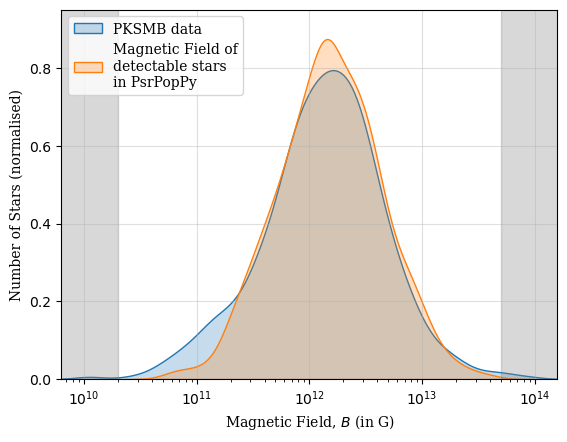

In [11]:
fig, ax = plt.subplots()

plt.rcParams["font.family"] = "serif"
label = ["Magnetic Field of\ndetectable stars\nin PsrPopPy", "PKSMB data"]

sns.kdeplot(B_ATNF, ax = ax, log_scale = 10, fill = True, label = label[1])
sns.kdeplot(f_f_f["B_init (G)"], ax = ax, log_scale = 10, fill = True, label = label[0], color = "C1")

plt.fill_between(x = 10 ** np.linspace(9.7, 10.3, 100), y1 = 0, y2 = 1.1, color = "grey", alpha = 0.3)
plt.fill_between(x = 10 ** np.linspace(13.7, 14.3, 100), y1 = 0, y2 = 1.1, color = "grey", alpha = 0.3)
plt.xlim(10 ** 9.8, 10 ** 14.2)
plt.ylim(0, 0.95)

plt.xlabel(r"Magnetic Field, $B$ (in G)", fontfamily = "serif")
plt.ylabel(r"Number of Stars (normalised)", fontfamily = "serif")
plt.grid(alpha = 0.4)
plt.legend(loc = 2, prop={'family': "serif"})

plt.show()

In [12]:
# Comparison of datasets using KS-test
from scipy.stats import ks_2samp

NB, binsB, patches = plt.hist([np.log10(f_f_f["B_init (G)"]), np.log10(B_ATNF)], bins = 30, density = True)
x1, x2 = NB
plt.close()

print("Comparing entire datasets:\n\t", ks_2samp(x1, x2, method = 'exact'))

print("Comparing truncated datasets:\n\t", ks_2samp(x1[2:-2], x2[2:-2], method = 'exact'))

Comparing entire datasets:
	 KstestResult(statistic=0.2, pvalue=0.5940706297759378, statistic_location=0.006323481092937713, statistic_sign=1)
Comparing truncated datasets:
	 KstestResult(statistic=0.15384615384615385, pvalue=0.9260194717268708, statistic_location=0.044264367650563984, statistic_sign=1)


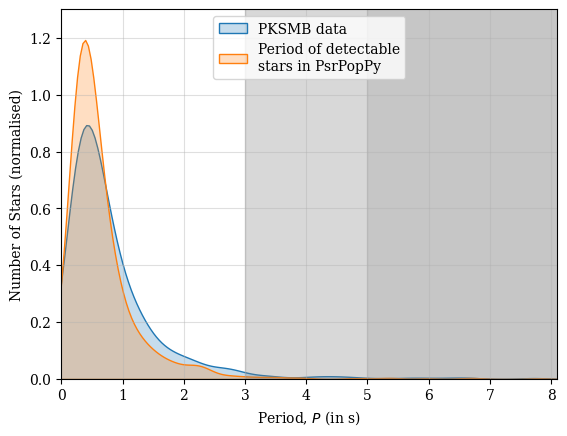

In [13]:
fig, ax = plt.subplots()

label = ["Period of detectable\nstars in PsrPopPy", "PKSMB data"]
sns.kdeplot(P_ATNF, ax = ax, label = label[1], fill = True)
sns.kdeplot(f_f_f["Period (ms)"] / 1000, ax = ax, label = label[0], fill = True)
plt.fill_between(x = np.linspace(3, 8.15, 100), y1 = 0, y2 = 1.7, color = "grey", alpha = 0.3)
plt.fill_between(x = np.linspace(5, 8.15, 100), y1 = 0, y2 = 1.7, color = "grey", alpha = 0.2)
plt.xlim(-0, 8.1)
plt.ylim(0, 1.3)

plt.xlabel(r"Period, $P$ (in s)", fontfamily = "serif")
plt.ylabel(r"Number of Stars (normalised)", fontfamily = "serif")
plt.legend(loc = 9, prop={'family': "serif"})

plt.grid(alpha = 0.4)

plt.show()

In [14]:
# Comparison of datasets using KS-test
from scipy.stats import ks_2samp

NP, binsP, patches = plt.hist([f_f_f["Period (ms)"] / 1000, P_ATNF], bins = 42, density = True)
x1, x2 = NP
plt.close()

print("Comparing entire datasets:\n\t", ks_2samp(x1, x2, method = 'exact'))

print("Comparing P < 5 sec:\n\t", ks_2samp(x1[:27], x2[:27], method = 'exact'))

print("Comparing P < 3 sec:\n\t", ks_2samp(x1[:17], x2[:17], method = 'exact'))

Comparing entire datasets:
	 KstestResult(statistic=0.35714285714285715, pvalue=0.008946641495685958, statistic_location=0.004474879101904354, statistic_sign=1)
Comparing P < 5 sec:
	 KstestResult(statistic=0.25925925925925924, pvalue=0.3290078898658627, statistic_location=0.004474879101904332, statistic_sign=1)
Comparing P < 3 sec:
	 KstestResult(statistic=0.17647058823529413, pvalue=0.9631071252458352, statistic_location=0.01789951640761733, statistic_sign=1)


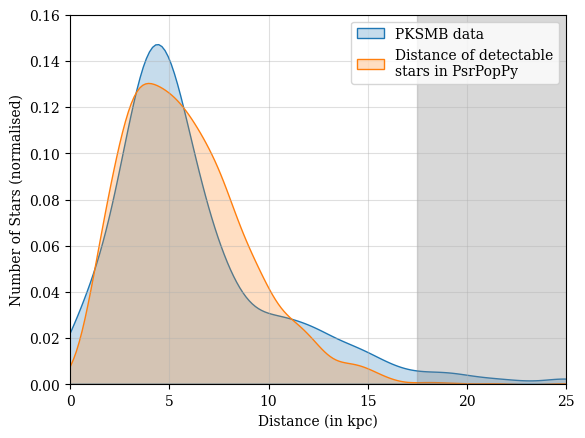

In [15]:
fig, ax = plt.subplots()

label = ["Distance of detectable\nstars in PsrPopPy", "PKSMB data"]

sns.kdeplot(Dist_ATNF, ax = ax, fill = True, label = label[1])
sns.kdeplot(f_f_f["Distance (kpc)"], ax = ax, fill = True, label = label[0])

plt.xlabel(r"Distance (in kpc)", fontfamily = "serif")
plt.ylabel(r"Number of Stars (normalised)", fontfamily = "serif")
plt.legend(loc = 1, prop={'family': "serif"})
plt.fill_between(x = np.linspace(17.5, 25.2, 100), y1 = 0, y2 = 0.21, color = "grey", alpha = 0.3)
plt.xlim(0, 25)
plt.ylim(0, 0.16)
plt.grid(alpha = 0.4)

plt.show()

In [16]:
# Comparison of datasets using KS-test
from scipy.stats import ks_2samp

NDist, binsDist, patches = plt.hist([f_f_f["Distance (kpc)"], Dist_ATNF], bins = "auto", density = True)
x1, x2 = NDist
plt.close()

print("Comparing entire datasets:\n\t", ks_2samp(x1, x2, method = 'exact'))

print("Comparing truncated datasets:\n\t", ks_2samp(x1[:29], x2[:29], method = 'exact'))

Comparing entire datasets:
	 KstestResult(statistic=0.3, pvalue=0.054141077480362725, statistic_location=0.0013324025169764802, statistic_sign=1)
Comparing truncated datasets:
	 KstestResult(statistic=0.1724137931034483, pvalue=0.7912277967552497, statistic_location=0.01065922013581181, statistic_sign=1)


<h2>Monte Carlo Analysis</h2>

<h3>Data Filtering</h3>
<p> From the catalogue, we filter out neutron stars which have a relative velocity greater than $1000 \  km/s$ (or less than $-1000 \ km/s$) from the sun. </p>

In [17]:
from MainFile import Find_decent_Vrel as fdV

bl = fdV([np.array(f["X (kpc)"]), np.array(f["Y (kpc)"]), np.array(f["Z (kpc)"])],
         [np.array(f["Vx"]), np.array(f["Vy"]), np.array(f["Vz"])],
         np.array(f["Distance (kpc)"]))

print("\nInitial Number of stars:", len(f.index))
ff = f[bl.check_Vrel(-1000, 1000)]
print("Number of stars after reduction:", len(ff.index))

print(" Max and min logB:", np.log10(np.max(ff["B_init (G)"])), np.log10(np.min(ff["B_init (G)"])), "\n",
     "Max and min Period:", np.max(ff["Period (ms)"])/1000, np.min(ff["Period (ms)"])/1000, "\n",
     "Max and min alpha:", np.max(ff["Misalignment angle"]), np.min(ff["Misalignment angle"]))

/var/folders/zn/fx9ngdfs335czg37p256r4_00000gp/T/ipykernel_22293/4160193979.py:3: SyntaxWarning: 
Order of parameters: [X, Y, Z]; [Vx, Vy, Vz]; distance
  bl = fdV([np.array(f["X (kpc)"]), np.array(f["Y (kpc)"]), np.array(f["Z (kpc)"])],



Initial Number of stars: 2012568
Number of stars after reduction: 2000916
 Max and min logB: 14.485565524376133 10.170931013924543 
 Max and min Period: 9.999366678307943 0.010100008421282381 
 Max and min alpha: 89.99999388166276 0.0219549931538406


In [18]:
B = ff["B_init (G)"]
P = ff["Period (ms)"] /1000
alpha = ff["Misalignment angle"] * np.pi/180
pos = [np.array(ff["X (kpc)"]), np.array(ff["Y (kpc)"]), np.array(ff["Z (kpc)"])]
vel = [np.array(ff["Vx"]), np.array(ff["Vy"]), np.array(ff["Vz"])]
distance = ff["Distance (kpc)"]
gb = ff["Galactic Latitude (degrees)"]
gl = ff["Galactic Longitude (degrees)"]

<h3>Measuring Luminosity from each Star</h3>

In [19]:
from MainFile import Surface_Element

stars = Surface_Element(B, P, alpha, pos, vel, distance, 1) # taking ma = 1 mueV and gayy = 10^-10

/var/folders/zn/fx9ngdfs335czg37p256r4_00000gp/T/ipykernel_22293/711555357.py:3: SyntaxWarning: Order of parameters: B (in G), P (in seconds), alpha (in radiens), co-ordinates(x, y, z) (in kpc), velocity(vx, vy, vz) (in km/s), distance (in kpc), axion mass (in micro eV) and time (in Million years). Permissible axion mass values - 0.1, 1, 10, 16.543 (4 GHz), 24.814 (6 GHz), 33.085 (8 GHz), 100.
  stars = Surface_Element(B, P, alpha, pos, vel, distance, 1) # taking ma = 1 mueV and gayy = 10^-10


In [20]:
# Expressing NFW profile in Natural Units 

c = 299_792_458 # m/s
hbar = 6.582119 * 1e-25 # GeV . s
sec = (1/hbar) # GeV^-1
m = (1/c) * sec # GeV^-1
kg = (1/1.7827) * 1e27 # GeV
GEV = 1
cm = 0.01 * m

rho_init = 0.45 * GEV / (cm**3) # GeV^4 (local DM density)

rs = 8.1 # kpc
r_rs = (8/8.1)

rho_s = 0.51 * (r_rs) * ((1+r_rs)**2) # GeV^4 
rho_NFW = lambda r: rho_s / ( (r/rs) * (( 1 + (r/rs) )**2) ) * GEV / (cm**3)

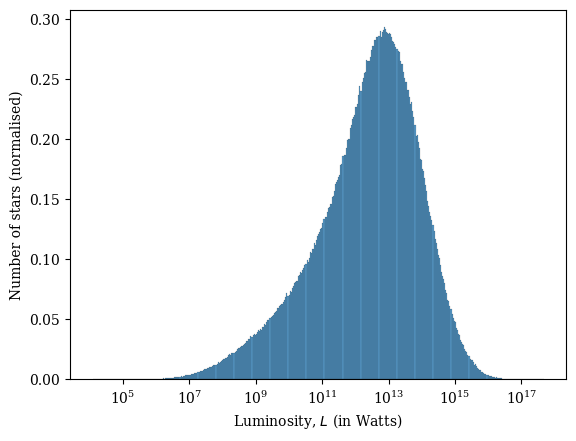

In [21]:
distance_from_GC = np.sqrt( (pos[0]*pos[0]) + (pos[1]*pos[1]) + (pos[2]*pos[2]) )

L = stars.interpolation() * 1.602176634e-19 # expressing power in Watts

#introducing DM NFW profile
L = (L/rho_init) * rho_NFW(distance_from_GC)

sns.histplot(L, log_scale = 10, stat = "density")
plt.xlabel(r"Luminosity, $L$ (in Watts)", fontfamily = "serif")
plt.ylabel("Number of stars (normalised)", fontfamily = "serif")
plt.show()

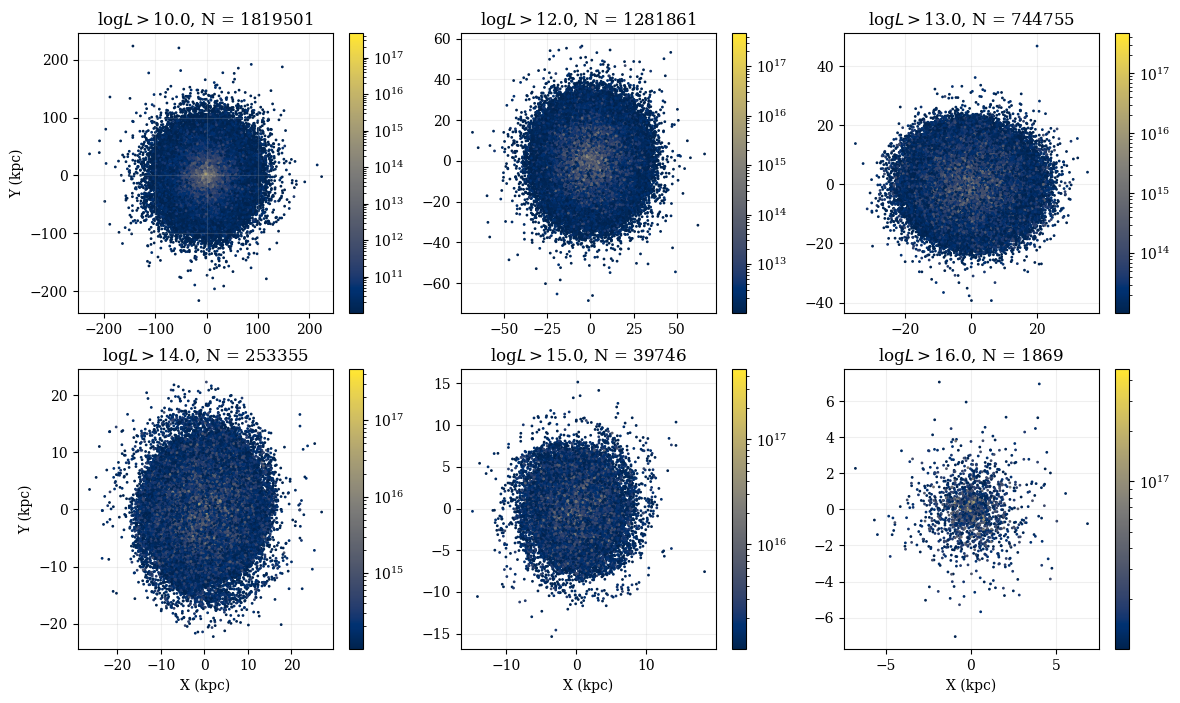

In [22]:
def xy_vs_L(delimiter):
    f_f_f = ff[L > delimiter]
    
    scatter = plt.scatter(f_f_f["X (kpc)"], f_f_f["Y (kpc)"], c = L[L > delimiter], s = 1,
                         norm = LogNorm(), cmap = "cividis")
    plt.colorbar(scatter)
    plt.grid(alpha = 0.2)
    plt.rc('axes', axisbelow=True)
    plt.title(r"log$L > $" + str(np.log10(delimiter)) + ", N = " + str(L[L > delimiter].size), fontfamily = "serif")

fig = plt.figure(figsize = (14, 8))

plt.subplot(2,3,1)
xy_vs_L(1e10)
plt.ylabel("Y (kpc)", fontfamily = "serif")

plt.subplot(2,3,2)
xy_vs_L(1e12)

plt.subplot(2,3,3)
xy_vs_L(1e13)

plt.subplot(2,3,4)
xy_vs_L(1e14)
plt.ylabel("Y (kpc)", fontfamily = "serif")
plt.xlabel("X (kpc)", fontfamily = "serif")

plt.subplot(2,3,5)
xy_vs_L(1e15)
plt.xlabel("X (kpc)", fontfamily = "serif")

plt.subplot(2,3,6)
xy_vs_L(1e16)
plt.xlabel("X (kpc)", fontfamily = "serif")

plt.show()

<h2>Frequency Spectrum</h2>

In [23]:
fobs = stars.fobs()

delf_c, I, num = stars.allsky_intensity(fobs, L, 1e5) # bandwidth = 100 kHz

kb = 1.380649e-23 * 1e26 # Jy m^2 K^-1
ma = 1000 * 1 * 1e-6 * stars.freq_factor # MHz
axion_wv = (stars.c*1000) / (ma * 1e6) # m
print(f"Wavelength corresponding to ma = 1 mueV: %.5f" % axion_wv, "m", sep = " ")

# System Temperature
T = I * (axion_wv**2) / (2 * kb)

Wavelength corresponding to ma = 1 mueV: 1.24153 m


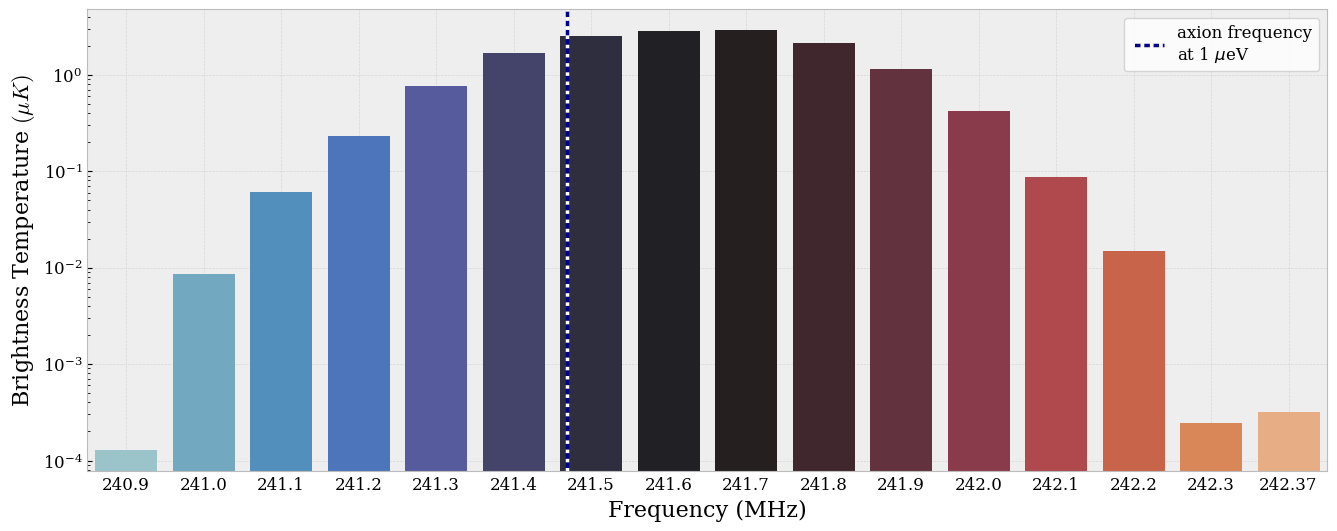

In [24]:
plt.figure(figsize = (16,6))

with plt.style.context('bmh'):
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['axes.axisbelow'] = True
    sns.barplot(x = np.round(1000*delf_c, decimals = 2), y = T * 1e6, palette = "icefire")
    plt.axvline(x = (ma - 1000 * delf_c[0]) / (1000 * (delf_c[2] - delf_c[1])), 
                color = "white", label = r"axion frequency" + "\n" + r"at 1 $\mu$eV", alpha = 1,
                linestyle = ":", lw = 2.5, gapcolor = "darkblue")

    plt.yscale("log")
    plt.ylabel(r"Brightness Temperature $(\mu K)$", fontsize = 13+3)
    plt.xlabel("Frequency (MHz)", fontsize = 13+3)
    plt.xticks(fontsize = 11+1)
    plt.yticks(fontsize = 11+1)
plt.legend(labelcolor = "black", facecolor = "white", fontsize = "large")
plt.grid(alpha = 0.4)
plt.show()

In [25]:
# Gaussian fit to the frequency spectrum

def gaussian(x, A, loc, scale):
    return stats.norm.pdf(x, loc, scale) * A

# print(delf_c)
popt, pcov = cf(gaussian, 1000 * delf_c, T, p0 = [1e-6, ma, 0.1])

print(popt)

[1.49795384e-06 2.41626790e+02 1.97815239e-01]


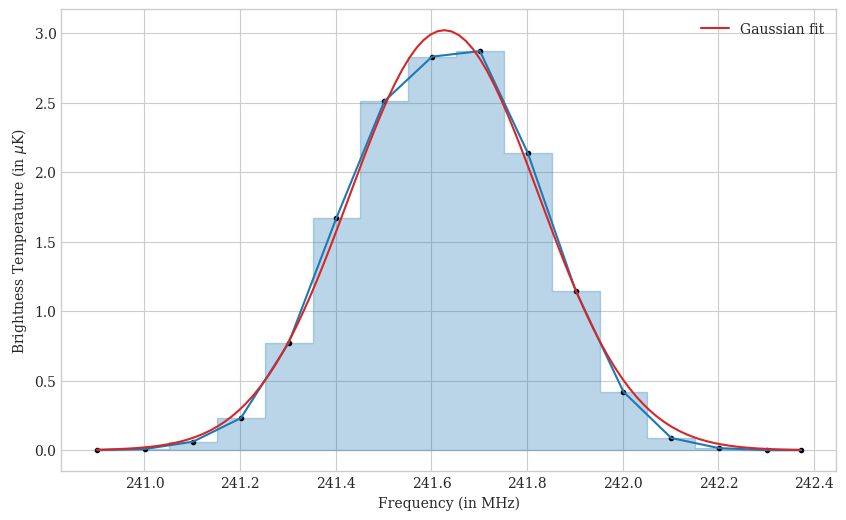

In [26]:
x = np.linspace(240.9, 242.37, 100)

fig = plt.figure(figsize = (10,6))
with plt.style.context("seaborn-v0_8-whitegrid"):
    plt.rcParams["font.family"] = "serif"
    plt.plot(1000 * delf_c, 1e6 * T)
    plt.fill_between(1000 * delf_c, 1e6 * T, alpha = 0.3, step = "mid", color = "C0")
    plt.scatter(1000 * delf_c, 1e6 * T, marker = ".", color = "black")
    
    plt.plot(x, 1e6 * gaussian(x, *popt), label = "Gaussian fit", color = "C3")
    plt.xlabel("Frequency (in MHz)")
    plt.ylabel(r"Brightness Temperature (in $\mu$K)")
    plt.legend()
    
plt.show()

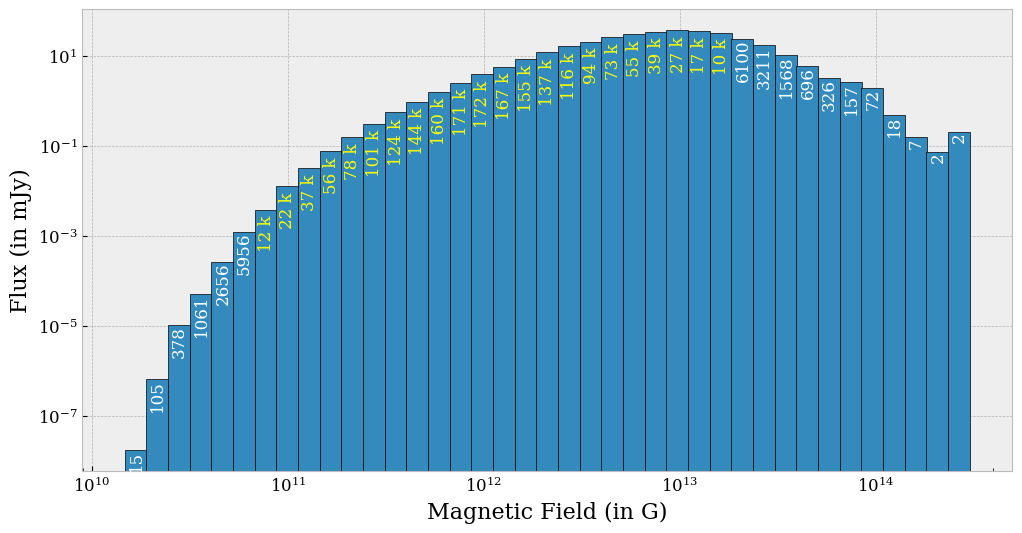

In [27]:
bins = 10 ** np.linspace(np.log10(np.min(ff["B_init (G)"])), np.log10(np.max(ff["B_init (G)"])), 40)

binned_power = []
count = []

binned_flux = []
binned_temperature = []
dataframe = pd.DataFrame({"B": ff["B_init (G)"], 
                         "L": L,
                         "dist": ff["Distance (kpc)"]})

for i in range(bins.size - 1):
    ffff = dataframe[(bins[i] <= dataframe["B"]) & (dataframe["B"] <= bins[i+1])]
    count.append(len(ffff["L"].index))
    binned_power.append(np.sum(np.array(ffff["L"])))
    
    flux = np.array(ffff["L"]) / (4 * np.pi * np.array(ffff["dist"])**2 * 1e5) 
    flux = (flux / (3.086e19 * 3.086e19)) * 1e26
    binned_flux.append(np.sum(flux))


bin_center = 10 ** (np.log10(bins[:-1]) + (np.log10(bins[1:])-np.log10(bins[:-1]))/2)
fig = plt.figure(figsize = (12,6))

plt.rcdefaults()
with plt.style.context("bmh"):
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['axes.axisbelow'] = True
    
    bar1 = plt.bar(bin_center, np.array(binned_flux) * 1e3, width = np.diff(bins),
                   log = "True", ec = "black")

    for rect, items in zip(bar1, count):
        height = rect.get_height()
        if(height != 0 and items < 10000):
            plt.text(10**np.log10(rect.get_x() + rect.get_width() / 2.0), 10**np.log10(height), items, 
                     ha='center', va='top', rotation = 90, color = "white", size = 12)

        elif(height != 0 and items > 10000):
            plt.text(10**np.log10(rect.get_x() + rect.get_width() / 2.0), 10**np.log10(height),
                     str(int(items/1000)) + " k ", 
                     ha='center', va='top', rotation = 90, color = "yellow", size = 12)

plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"Magnetic Field (in G)", fontsize = 16)
plt.ylabel(r"Flux (in mJy)", fontsize = 16)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

<h2>Sky Maps</h2>

In [28]:
def pix_map(NSIDE, gal_l, gal_b, dist, L, smoothing_beam = 5):
    theta, phi = (np.array(gal_b) + 90) * np.pi/180, np.array(gal_l) * np.pi/180
    
    pixels = hp.ang2pix(NSIDE, theta, phi)
    NPIX = hp.nside2npix(NSIDE)
    print("Approximate resolution at NSIDE {} is {:.2} deg".format(NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60))
    print("Number of pixels:", NPIX)
    
    p_map = np.zeros(np.max(NPIX))
    dist = np.array(dist)
    for i in range(pixels.size):
        p = pixels[i]
        t = L[i] / (4*np.pi*dist[i]*dist[i]*0.4653 * 1e6* (4*np.pi/NPIX)) * (axion_wv**2) / (2 * kb)
        t = (t / (3.086e19 * 3.086e19)) * 1e26
        p_map[p - 1] += t
        
    if (smoothing_beam == 0):
        return p_map
    p_map = hp.sphtfunc.smoothing(p_map, fwhm = smoothing_beam * np.pi / 180)
    return p_map

# ---------------------------------------

def pix_map_for_N(NSIDE, gal_l, gal_b, dist, L):
    theta, phi = (np.array(gal_b) + 90) * np.pi/180, np.array(gal_l) * np.pi/180
    
    pixels = hp.ang2pix(NSIDE, theta, phi)
    NPIX = hp.nside2npix(NSIDE)
    print("Approximate resolution at NSIDE {} is {:.2} deg".format(NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60))
    print("Number of pixels:", NPIX)
    N_stars = np.zeros(np.max(NPIX))
    
    dist = np.array(dist)
    for i in range(pixels.size):
        p = pixels[i]
        N_stars[p - 1] += 1
    return N_stars

Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152


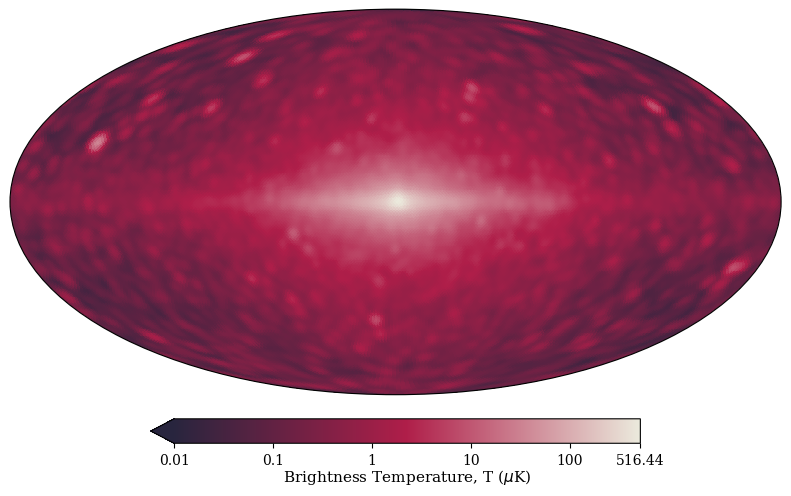

In [29]:
p_map64_0 = pix_map(64, gl, gb, distance, L, 3.7)

p_map64_0[p_map64_0 <= 0] = np.nan
projview(p_map64_0 * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
        unit = r"Brightness Temperature, T ($\mu$K)", 
        fontsize = {"cbar_label": 11, "cbar_tick_label": 10}, min = 0.01, fontname = "serif",
        # max = np.max(1e6*p_map64_0),
        cbar_ticks = [1e-2, 1e-1, 1e0, 1e1, 1e2, np.round(np.max(1e6*p_map64_0),2)])
plt.show()

Approximate resolution at NSIDE 32 is 1.8 deg
Number of pixels: 12288


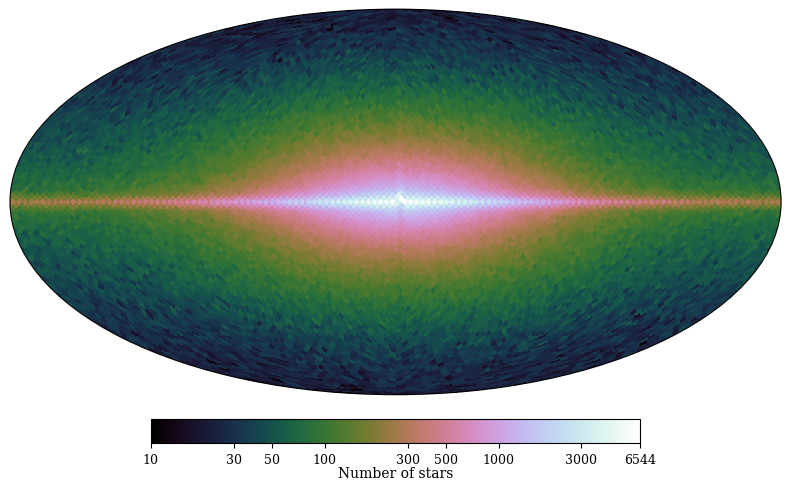

In [30]:
N_map64 = pix_map_for_N(32, gl, gb, distance, L)

projview(N_map64, coord = "G", cmap = "cubehelix", norm = "log", flip="astro", projection_type="mollweide",
        unit = r"Number of stars", fontsize = {"cbar_label": 10, "cbar_tick_label": 9}, fontname = "serif",
        cbar_ticks = [10, 30, 50, 100, 300, 500, 1000, 3000, 6544])

plt.show()

<h3>Comparison with Burkert profile</h3>

Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152
Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152


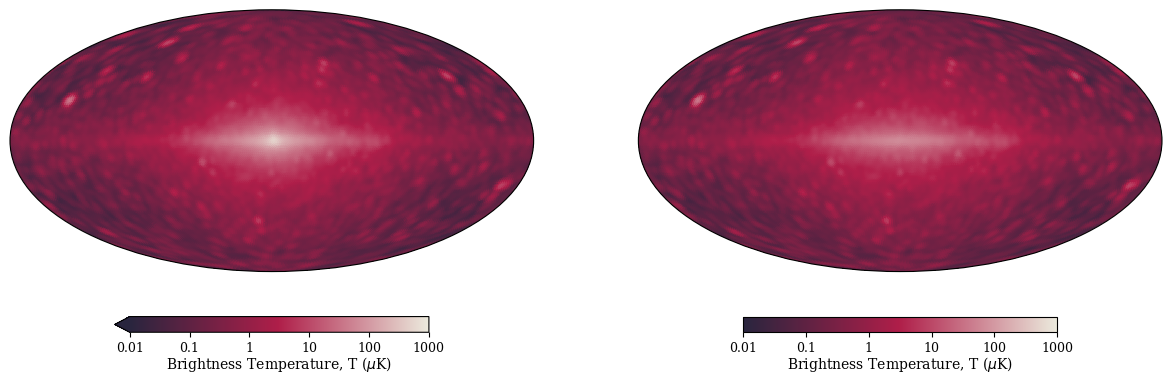

In [31]:
rho_Burkert = lambda r: rho_s / ( (1 + (r/rs)) * ( 1 + ((r/rs)**2) ) ) * GEV / (cm**3)

L_burkert = (L / rho_NFW(distance_from_GC)) * rho_Burkert(distance_from_GC)

fig = plt.figure(figsize = (12, 10))

p_map64_0_burkert = pix_map(64, gl, gb, distance, L_burkert, smoothing_beam = 3.7)

p_map64_0_burkert[p_map64_0_burkert <= 0] = np.nan
projview(p_map64_0_burkert * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
         unit = r"Brightness Temperature, T ($\mu$K)", fontsize = {"cbar_label": 10, "cbar_tick_label": 9},
         min = 0.01, fontname = "serif", cbar_ticks = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], sub = 122)

# -----------------------------------------------------------------

p_map64_0 = pix_map(64, gl, gb, distance, L, 3.7)

p_map64_0[p_map64_0 <= 0] = np.nan
projview(p_map64_0 * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
        unit = r"Brightness Temperature, T ($\mu$K)", fontsize = {"cbar_label": 10, "cbar_tick_label": 9}, 
        min = 0.01, fontname = "serif", cbar_ticks = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], sub = 121)


plt.show()

<h3>Zoomed view</h3>

Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152
54.967782589078496 arc-min


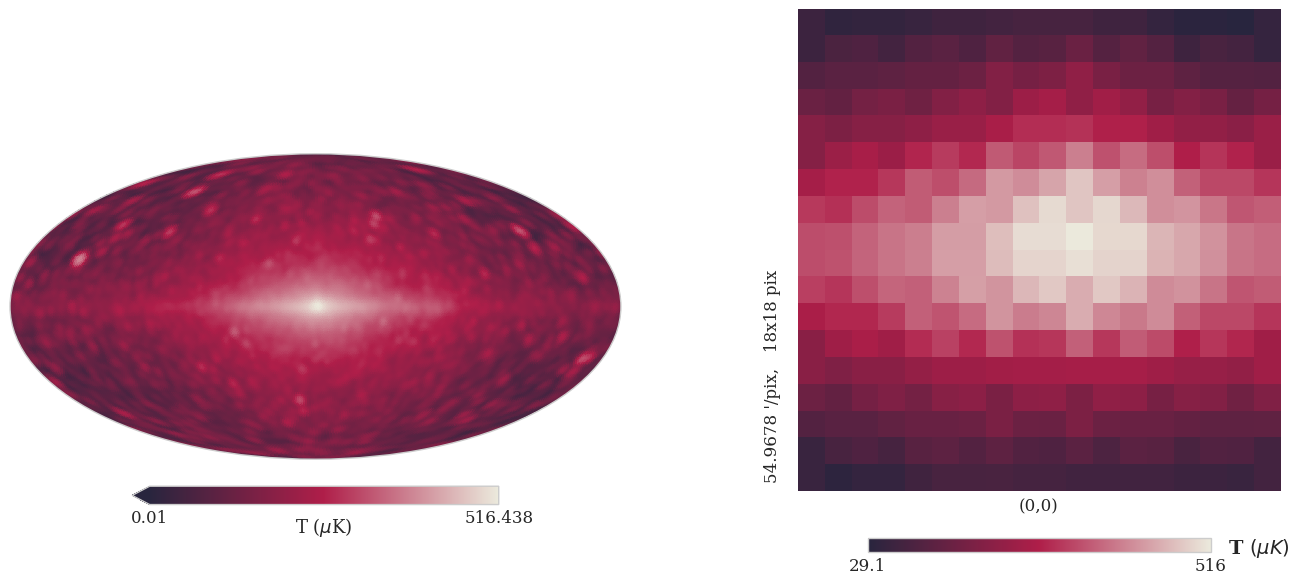

In [32]:
p_map64_sm = pix_map(64, gl, gb, distance, L, 3.7)

fig = plt.figure(figsize = (14,6))

with plt.style.context("seaborn-v0_8-whitegrid"):
    plt.rcParams["font.family"] = "serif"
    plt.rcParams.update({'font.size': 12})
    projview(p_map64_sm * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
            unit = r"T ($\mu$K)", fontsize = {"cbar_label": 13, "cbar_tick_label": 12}, min = 0.01, sub = 121)
    
    reso = hp.nside2resol(64, arcmin = True)
    print(reso, "arc-min")
    hp.visufunc.gnomview(p_map64_sm * 1e6, rot = (0,0,0), cmap = swift.red, reso = reso, 
                        xsize=1000/(reso), title = None, unit = r"T $(\mu K)$",norm = "log", sub = 122)

plt.show()

Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152
Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152
Approximate resolution at NSIDE 16 is 3.7 deg
Number of pixels: 3072


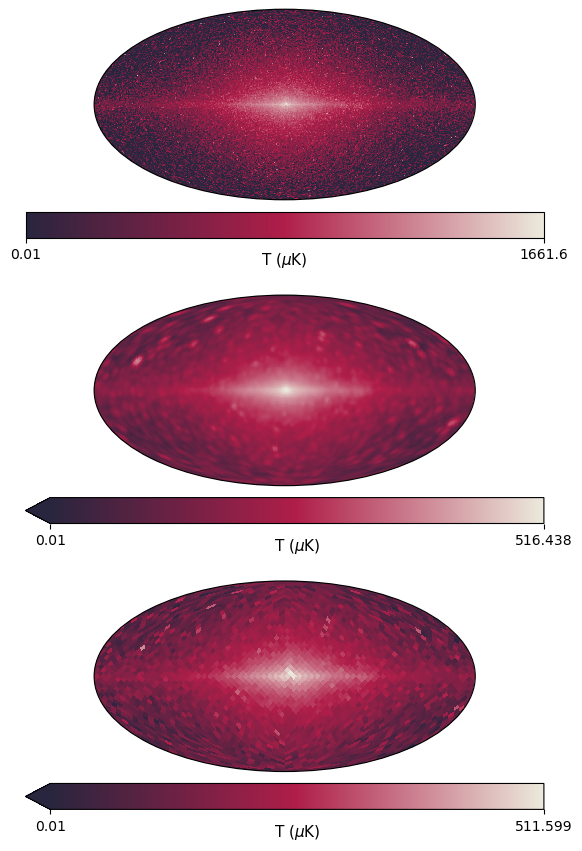

In [33]:
fig = plt.figure(figsize = (9,9))

p_map64_0 = pix_map(64, gl, gb, distance, L, 0)

p_map64_0[p_map64_0 <= 0] = np.nan
projview(p_map64_0 * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
        unit = r"T ($\mu$K)", fontsize = {"cbar_label": 11, "cbar_tick_label": 10}, sub = 311, min = 0.01)

# -------------------------------------------------------------------------------------------------
p_map64_5 = pix_map(64, gl, gb, distance, L, 3.7)

p_map64_5[p_map64_5 <= 0] = np.nan
projview(p_map64_5 * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
        unit = r"T ($\mu$K)", fontsize = {"cbar_label": 11, "cbar_tick_label": 10}, sub = 312, min = 0.01)

# -------------------------------------------------------------------------------------------------
p_map16_0 = pix_map(16, gl, gb, distance, L, 0)

p_map16_0[p_map16_0 <= 0] = np.nan
projview(p_map16_0 * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
        unit = r"T ($\mu$K)", fontsize = {"cbar_label": 11, "cbar_tick_label": 10}, sub = 313, min = 0.01)

plt.show()

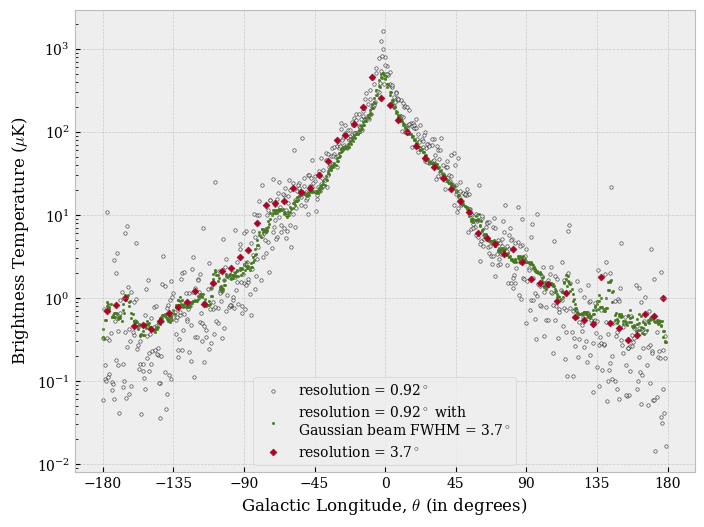

In [34]:
delimiter = 1

LL = L[(gb < delimiter) & (gb > -delimiter)]
dist = distance[(gb < delimiter) & (gb > -delimiter)]
gb_trunc = gl[(gb < delimiter) & (gb > -delimiter)]

def referenced_sorting(X, Y):
    Y_sort = np.array([x for _, x in sorted(zip(X, Y))]) # X dictates order
    return Y_sort
# ------------------------------

def strip(NSIDE, p_map):
    NPIX = hp.nside2npix(NSIDE)
    T = LL / (4*np.pi*dist*dist*1e6 * (4*np.pi/NPIX)) * (axion_wv**2) / (2 * kb)
    T = (T / (3.086e19 * 3.086e19)) * 1e26

    
    phi, theta = hp.pix2ang(NSIDE, np.arange(0, hp.nside2npix(NSIDE), 1), lonlat = True)
    
    t_t_t = theta[(theta < delimiter) & (theta > -delimiter)]
    p_p_p = phi[(theta < delimiter) & (theta > -delimiter)]
    T_smooth_bins = p_map[(theta < delimiter) & (theta > -delimiter)]
    half_no = int(t_t_t.size / 2)
    X = np.concatenate((p_p_p[half_no:] - 180, p_p_p[:half_no] - 180))
    Y = np.concatenate((T_smooth_bins[:half_no], T_smooth_bins[half_no:]))
    return X, Y

fig = plt.figure(figsize = (8,6))

with plt.style.context("bmh"):
    plt.rcParams["font.family"] = "serif"
    p64_0, T_bins64_0 = strip(64, p_map64_0)
    plt.scatter(p64_0, 1e6 * T_bins64_0, s = 6, label = r"resolution = 0.92$^\circ$",
                alpha = 0.7, color = "white", ec = "black")
    
    p64_5, T_bins64_5 = strip(64, p_map64_5)
    plt.scatter(p64_5, 1e6 * T_bins64_5, s = 10, marker = ".", 
                label = "resolution = 0.92$^\circ$ with\nGaussian beam FWHM = 3.7$^\circ$", 
                alpha = 1, c = "C3")
    
    p16_0, T_bins16_0 = strip(16, p_map16_0)
    plt.scatter(p16_0, 1e6 * T_bins16_0, s = 12, c = "C1", alpha = 1, marker = "D", 
               label = r"resolution = 3.7$^\circ$")
    
    plt.yscale("log")
    plt.xlabel(r"Galactic Longitude, $\theta$ (in degrees)")
    plt.ylabel(r"Brightness Temperature ($\mu$K)")
    plt.grid(alpha = 0.6)
    plt.legend(loc = 8)
    plt.xticks(np.linspace(-180, 180, 9))
    
plt.show()

Approximate resolution at NSIDE 1024 is 0.057 deg
Number of pixels: 12582912
[ 0.00147965 -0.76909649]


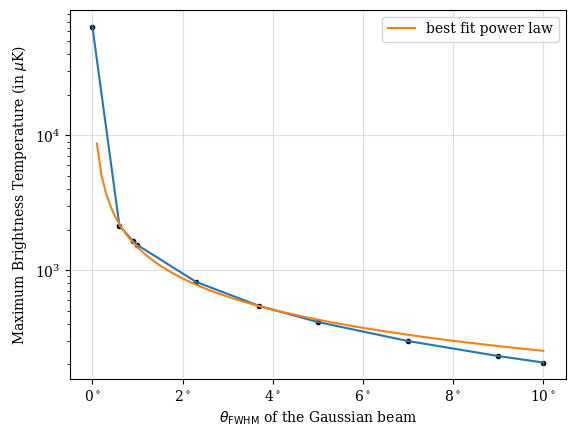

In [35]:
NSIDE_choice = 1024

p_map1024_0 = pix_map(NSIDE_choice, gl, gb, distance, L, 0)
p_map1024_0[p_map1024_0 < 1e-8] = np.nan

T_max_array = np.array([])
theta_smooth = np.array([0, 0.6, 0.9, 1, 2.3, 3.7, 5, 7, 9, 10])

with HiddenPrints():
    for i in theta_smooth:
        p_map1024_ = pix_map(NSIDE_choice, gl, gb, distance, L, i)
        X, Y = strip(NSIDE_choice, p_map1024_)
        T_max_array = np.append(T_max_array, np.nanmax(Y))

# ---------------------------------------------------

def best_fit(x, A, n):
    return A * ((x) ** n)
    
labels = []

popt, pcov = cf(best_fit, theta_smooth[1:], T_max_array[1:], p0 = [T_max_array[3],  -1])

print(popt)

Xaxis = np.linspace(0.1, 10, 100)

for i in np.arange(0, 11, 2):
    labels.append(str(i) + r"$^\circ$")

with plt.style.context("default"):
    plt.rcParams["font.family"] = "serif"
    plt.plot(theta_smooth, T_max_array * 1e6)
    plt.scatter(theta_smooth, T_max_array * 1e6, marker = ".", color = "black")
    plt.plot(Xaxis, 1e6 * best_fit(Xaxis, *popt), label = "best fit power law")
    plt.ylabel(r"Maximum Brightness Temperature (in $\mu$K)")
    plt.xlabel(r"$\theta_{\rm FWHM}$ of the Gaussian beam")
    plt.yscale("log")
    plt.xticks(np.arange(0,11,2), labels = labels)
    plt.legend()
    plt.grid(alpha = 0.4)
    
plt.show()    

<h3>Manual addition of the GC magnetar, PSR J1745-2900</h3>

In [36]:
B_GCM = np.append(B, 1.6 * 1e14)
P_GCM = np.append(P, 3.76)
alpha_GCM = np.append(alpha, 18 * np.pi / 180)

X, Y, Z = np.array(ff["X (kpc)"]), np.array(ff["Y (kpc)"]), np.array(ff["Z (kpc)"])
X = np.append(X, - 1e-4) # 0.1 pc
Y = np.append(Y, 0)
Z = np.append(Z, 0)
pos_GCM = [X, Y, Z]

Vx, Vy, Vz = np.array(ff["Vx"]), np.array(ff["Vy"]), np.array(ff["Vz"])
Vx = np.append(Vx, 0)
Vy = np.append(Vy, 0)
Vz = np.append(Vz, 0)
vel_GCM = [Vx, Vy, Vz]

distance_GCM = np.append(distance, 8.5)

gb_GCM, gl_GCM = np.append(gb, 0), np.append(gl, 0)

In [37]:
stars_GCM = Surface_Element(B_GCM, P_GCM, alpha_GCM, pos_GCM, vel_GCM, distance_GCM, 1)

distance_from_GC_GCM = np.sqrt( (pos_GCM[0]*pos_GCM[0]) + (pos_GCM[1]*pos_GCM[1]) + (pos_GCM[2]*pos_GCM[2]) )

L_GCM = stars_GCM.interpolation() * 1.602176634e-19

#introducing DM NFW profile
L_GCM = (L_GCM/rho_init) * rho_NFW(distance_from_GC_GCM)

/var/folders/zn/fx9ngdfs335czg37p256r4_00000gp/T/ipykernel_22293/2020922249.py:1: SyntaxWarning: Order of parameters: B (in G), P (in seconds), alpha (in radiens), co-ordinates(x, y, z) (in kpc), velocity(vx, vy, vz) (in km/s), distance (in kpc), axion mass (in micro eV) and time (in Million years). Permissible axion mass values - 0.1, 1, 10, 16.543 (4 GHz), 24.814 (6 GHz), 33.085 (8 GHz), 100.
  stars_GCM = Surface_Element(B_GCM, P_GCM, alpha_GCM, pos_GCM, vel_GCM, distance_GCM, 1)


Approximate resolution at NSIDE 64 is 0.92 deg
Number of pixels: 49152


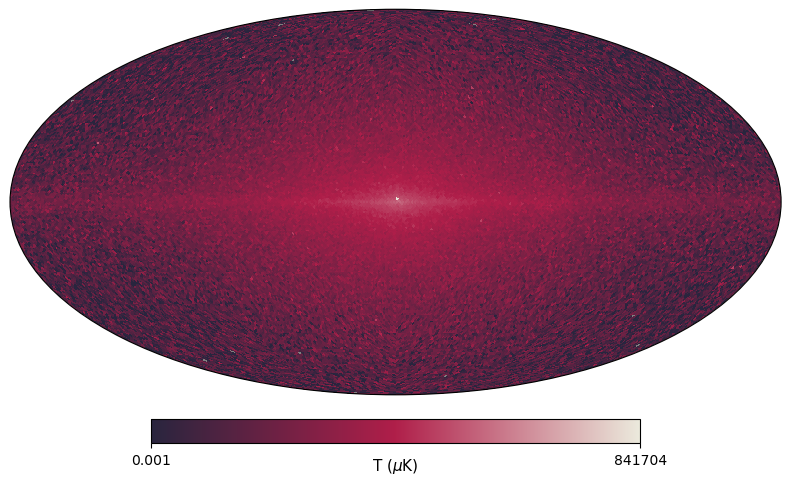

In [38]:
p_map64_0_GCM = pix_map(64, gl_GCM, gb_GCM, distance_GCM, L_GCM, 0)

p_map64_0_GCM[p_map64_0_GCM <= 0] = np.nan
projview(p_map64_0_GCM * 1e6, coord = "G", cmap = swift.red, norm = "log", flip="astro", projection_type="mollweide",
        unit = r"T ($\mu$K)", fontsize = {"cbar_label": 11, "cbar_tick_label": 10}, min = 0.001)
plt.show()

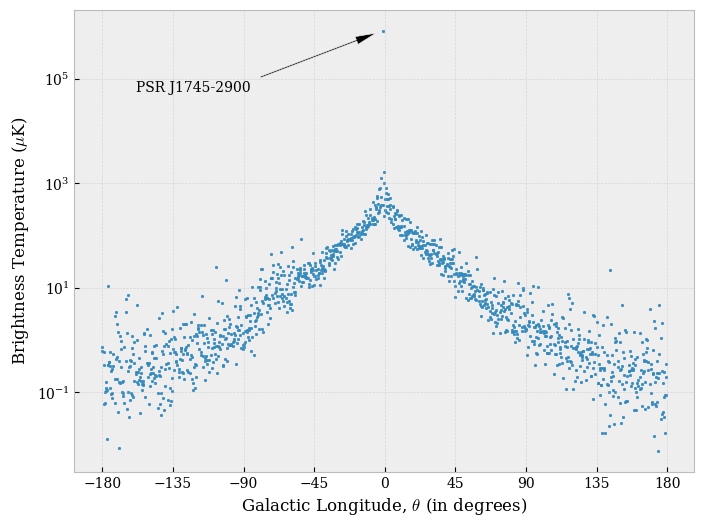

In [39]:
def strip_GCM(NSIDE, p_map, GCM_key):
    delimiter = 1.2
    if(GCM_key == 0):
        LL = L[(gb < delimiter) & (gb > -delimiter)]
        dist = distance[(gb < delimiter) & (gb > -delimiter)]
        gb_trunc = gl[(gb < delimiter) & (gb > -delimiter)]
    if(GCM_key == 1):
        LL = L_GCM[(gb_GCM < delimiter) & (gb_GCM > -delimiter)]
        dist = distance_GCM[(gb_GCM < delimiter) & (gb_GCM > -delimiter)]
        gb_trunc = gl_GCM[(gb_GCM < delimiter) & (gb_GCM > -delimiter)]

    NPIX = hp.nside2npix(NSIDE)
    Temp = LL / (4*np.pi*dist*dist*1e6 * (4*np.pi/NPIX)) * (axion_wv**2) / (2 * kb)
    Temp = (Temp / (3.086e19 * 3.086e19)) * 1e26
    
    phi, theta = hp.pix2ang(NSIDE, np.arange(0, hp.nside2npix(NSIDE), 1), lonlat = True)
    
    t_t_t = theta[(theta < delimiter) & (theta > -delimiter)]
    p_p_p = phi[(theta < delimiter) & (theta > -delimiter)]
    T_smooth_bins = p_map[(theta < delimiter) & (theta > -delimiter)]
    
    half_no = int(t_t_t.size / 2)
    X = np.concatenate((p_p_p[half_no:] - 180, p_p_p[:half_no] - 180))
    Y = np.concatenate((T_smooth_bins[:half_no], T_smooth_bins[half_no:]))
    return X, Y


fig = plt.figure(figsize = (8,6))

with plt.style.context("bmh"):
    plt.rcParams["font.family"] = "serif"
    p64_0_GCM, T_bins64_0_GCM = strip_GCM(64, p_map64_0_GCM, 1)
    plt.scatter(p64_0_GCM, 1e6 * T_bins64_0_GCM, s = 3, label = "NSIDE = 64")
    plt.annotate("PSR J1745-2900", (p64_0_GCM[T_bins64_0_GCM == np.max(T_bins64_0_GCM)], 1e6 * np.max(T_bins64_0_GCM)), 
                 xytext=(-122, 0.8e5 * np.max(T_bins64_0_GCM)),
                 arrowprops=dict(width = 1, headlength = 15, headwidth = 6, facecolor='black', shrink=0.05, linewidth = 0.5), 
                 ha = "center", va = "center")
    plt.yscale("log")
    plt.xlabel(r"Galactic Longitude, $\theta$ (in degrees)")
    plt.ylabel(r"Brightness Temperature ($\mu$K)")
    plt.grid(alpha = 0.4)
    plt.xticks(np.linspace(-180, 180, 9))
plt.show()

<h1>Chapter 4</h1>

<h3>Gaussian fit values for Magnetic Field and Period in ATNF</h3>

12.119001 0.5396304


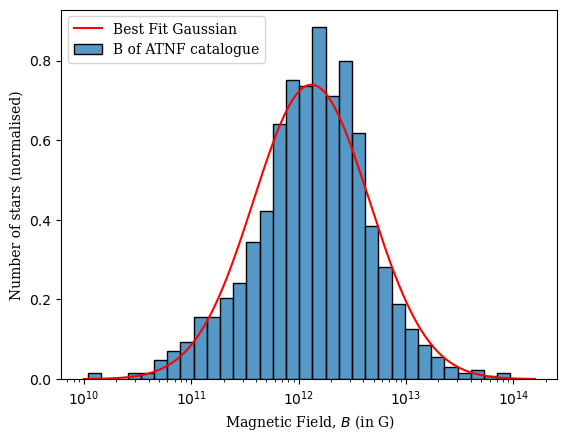

In [40]:
muB, sigmaB = stats.norm.fit(np.log10(B_ATNF))
print(muB, sigmaB)

x = np.linspace(10, 14.2, 1000)

sns.histplot(B_ATNF, log_scale = 10, stat = "density", label = "B of ATNF catalogue")
plt.plot(10 ** x,  stats.norm.pdf(x, muB, sigmaB), label = "Best Fit Gaussian", color = "red")
plt.xlabel("Magnetic Field, $B$ (in G)", fontfamily = "serif")
plt.ylabel(r"Number of stars (normalised)", fontfamily = "serif")
plt.legend(loc = 2, prop={'family': "serif"})

plt.show()

-0.23496422 0.36484587


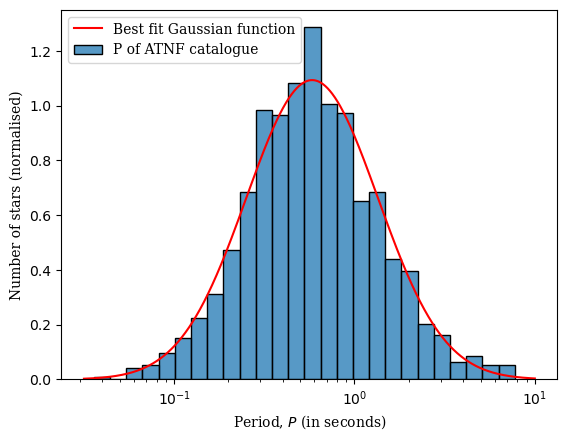

In [41]:
muP, sigmaP = stats.norm.fit(np.log10(P_ATNF))
print(muP, sigmaP)

x = np.linspace(-1.5, 1, 1000)

sns.histplot(P_ATNF, log_scale = 10, stat = "density", label = "P of ATNF catalogue")
plt.plot(10 ** x, stats.norm.pdf(x, muP, sigmaP), label = "Best fit Gaussian function", color = "red")
plt.xlabel(r"Period, $P$ (in seconds)", fontfamily = "serif")
plt.ylabel(r"Number of stars (normalised)", fontfamily = "serif")
plt.legend(loc = 2, prop={'family': "serif"})
plt.show()

<h3>Generating Neutron star catalogue</h3>

In [42]:
def catalogue(N = 1600):
    aB, bB = (10 - muB) / sigmaB, (14.6 - muB)/sigmaB
    B_cat = 10 ** stats.truncnorm.rvs(a = aB, b = bB, loc = muB, scale = sigmaB, size = N)

    aP, bP = (-2 - muP) / sigmaP, (1 - muP)/sigmaP
    P_cat = 10 ** stats.truncnorm.rvs(a = aP, b = bP, loc = muP, scale = sigmaP, size = N)
    
    alpha_cat = np.arccos(np.random.uniform(0, 1, size = N))

    return B_cat, P_cat, alpha_cat

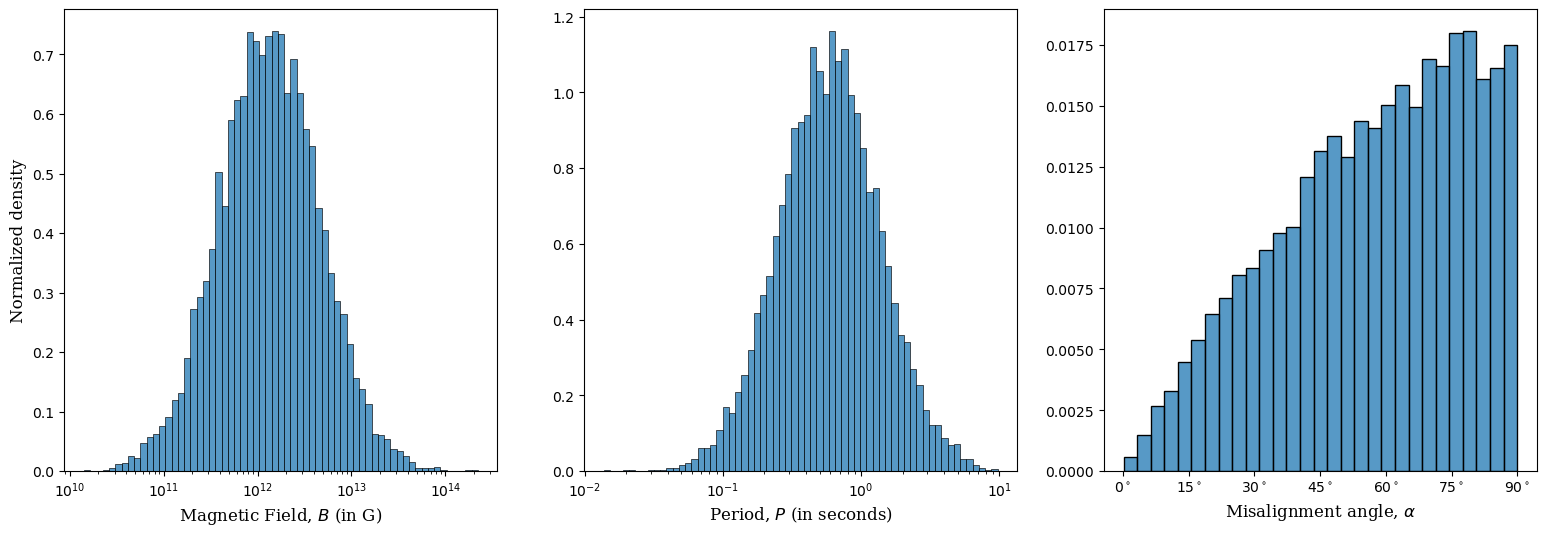

In [43]:
fig =  plt.figure(figsize =(19, 6))

B_new, P_new, alpha_new = catalogue(10000)

plt.subplot(1,3,1)
sns.histplot(B_new, log_scale = 10, stat = "density")
# sns.histplot(B, log_scale = 10, stat = "density", label = "ATNF")
plt.ylabel("Normalized density", fontsize = 12, fontfamily = "serif")
plt.xlabel(r"Magnetic Field, $B$ (in G)", fontsize = 12, fontfamily = "serif")

plt.subplot(1,3,2)
sns.histplot(P_new, log_scale = 10, stat = "density")
plt.xlabel(r"Period, $P$ (in seconds)", fontsize = 12, fontfamily = "serif")
plt.ylabel("")

plt.subplot(1,3,3)
sns.histplot(alpha_new * 180 / np.pi, stat = "density")
xticks = np.linspace(0, 90, 7, dtype = int)
plt.xticks(xticks, labels = [i + r"$^\circ$" for i in np.array(xticks, dtype = str)])
plt.xlabel(r"Misalignment angle, $\alpha$", fontsize = 12, fontfamily = "serif")
plt.ylabel("")

plt.show()

In [44]:
import warnings 
warnings.filterwarnings("ignore")

def GC_constraint(N):
    B_new, P_new, alpha_new = catalogue(N)
    
    stars4 = Surface_Element(B_new, P_new, alpha_new, np.zeros((3, N)), np.zeros((3, N)), np.zeros( N), 16.543) 
                                # ma = 4 GHz, gayy = 10^-10
    stars6 = Surface_Element(B_new, P_new, alpha_new, np.zeros((3, N)), np.zeros((3, N)), np.zeros( N), 24.814) 
                                # ma = 6 GHz, gayy = 10^-10
    stars8 = Surface_Element(B_new, P_new, alpha_new, np.zeros((3, N)), np.zeros((3, N)), np.zeros( N), 33.085) 
                                # ma = 8 GHz, gayy = 10^-10
    
    L4 = stars4.interpolation() * 1.602176634e-19 * (rho_NFW(0.001) / rho_init)
    L6 = stars6.interpolation() * 1.602176634e-19 * (rho_NFW(0.001) / rho_init)
    L8 = stars8.interpolation() * 1.602176634e-19 * (rho_NFW(0.001) / rho_init)
    
    distance = 8 * 3.086e+19 # distance of earth from the GC in m
    delta_f = 91.6 * 1e3 # Bandwidth of GBT in Hz
    
    Flux4 = np.sum(L4 / (4 * np.pi * distance * distance * delta_f) * 1e26) # Jy
    Flux6 = np.sum(L6 / (4 * np.pi * distance * distance * delta_f) * 1e26) # Jy
    Flux8 = np.sum(L8 / (4 * np.pi * distance * distance * delta_f) * 1e26) # Jy
    
    axion_wv4 = (stars4.c*1000) / (4 * 1e9) # m
    
    axion_wv6 = (stars6.c*1000) / (6 * 1e9) # m
    
    axion_wv8 = (stars8.c*1000) / (8 * 1e9) # m
    
    Intensity4 = np.abs(Flux4) / ( np.pi / 4 * (axion_wv4 / 100) * (axion_wv4 / 100) ) # Jy sr^-1
    Intensity6 = np.abs(Flux6) / ( np.pi / 4 * (axion_wv6 / 100) * (axion_wv6 / 100) ) # Jy sr^-1
    Intensity8 = np.abs(Flux8) / ( np.pi / 4 * (axion_wv8 / 100) * (axion_wv8 / 100) ) # Jy sr^-1
    
    
    kb = 1.380649e-23 * 1e26 # Boltzmann constant in Jy m^2 K^-1
    
    # System Temperature
    Temperature4 = Intensity4 * (axion_wv4**2) / (2 * kb)
    Temperature6 = Intensity6 * (axion_wv6**2) / (2 * kb)
    Temperature8 = Intensity8 * (axion_wv8**2) / (2 * kb)

    print("For N =", N, sep = " ")
    print(f"Sum of all fluxes at 4 GHz = {Flux4:.3f} Jy, and corresponding Brightness Temperature = {Temperature4:.3f} K")
    print(f"Sum of all fluxes at 6 GHz = {Flux6:.3f} Jy, and corresponding Brightness Temperature = {Temperature6:.3f} K")
    print(f"Sum of all fluxes at 8 GHz = {Flux8:.3f} Jy, and corresponding Brightness Temperature = {Temperature8:.3f} K")
    
    gayy_fid = 1e-10 # GeV^-1
    S_fid4 = Flux4 #Jy
    S_fid6 = Flux6 #Jy
    S_fid8 = Flux8 #Jy
    S_lim = 4 * 1e-3 #Jy
    
    gayy_lim4 = gayy_fid * ( (2 * S_lim / S_fid4) ** 0.5 )
    print(f"At 4 GHz, gayy < {gayy_lim4 * 1e12:.3f} x 1e-12")
    
    gayy_lim6 = gayy_fid * ( (2 * S_lim / S_fid6) ** 0.5 )
    print(f"At 6 GHz, gayy < {gayy_lim6 * 1e12:.3f} x 1e-12")
    
    gayy_lim8 = gayy_fid * ( (2 * S_lim / S_fid8) ** 0.5 )
    print(f"At 8 GHz, gayy < {gayy_lim8 * 1e12:.3f} x 1e-12")

    return [gayy_lim4, gayy_lim6, gayy_lim8]

In [45]:
glim_6 = GC_constraint(6)

For N = 6
Sum of all fluxes at 4 GHz = 0.088 Jy, and corresponding Brightness Temperature = 0.404 K
Sum of all fluxes at 6 GHz = 0.076 Jy, and corresponding Brightness Temperature = 0.353 K
Sum of all fluxes at 8 GHz = 0.034 Jy, and corresponding Brightness Temperature = 0.155 K
At 4 GHz, gayy < 30.219 x 1e-12
At 6 GHz, gayy < 32.347 x 1e-12
At 8 GHz, gayy < 48.786 x 1e-12


In [46]:
glim_60 = GC_constraint(60)

For N = 60
Sum of all fluxes at 4 GHz = 0.202 Jy, and corresponding Brightness Temperature = 0.930 K
Sum of all fluxes at 6 GHz = 0.096 Jy, and corresponding Brightness Temperature = 0.441 K
Sum of all fluxes at 8 GHz = 0.025 Jy, and corresponding Brightness Temperature = 0.115 K
At 4 GHz, gayy < 19.920 x 1e-12
At 6 GHz, gayy < 28.932 x 1e-12
At 8 GHz, gayy < 56.678 x 1e-12


In [47]:
glim_100 = GC_constraint(100)

For N = 100
Sum of all fluxes at 4 GHz = 0.313 Jy, and corresponding Brightness Temperature = 1.441 K
Sum of all fluxes at 6 GHz = 0.269 Jy, and corresponding Brightness Temperature = 1.242 K
Sum of all fluxes at 8 GHz = 0.194 Jy, and corresponding Brightness Temperature = 0.892 K
At 4 GHz, gayy < 15.999 x 1e-12
At 6 GHz, gayy < 17.231 x 1e-12
At 8 GHz, gayy < 20.332 x 1e-12


In [48]:
glim_300 = GC_constraint(300)

For N = 300
Sum of all fluxes at 4 GHz = 0.637 Jy, and corresponding Brightness Temperature = 2.937 K
Sum of all fluxes at 6 GHz = 0.473 Jy, and corresponding Brightness Temperature = 2.179 K
Sum of all fluxes at 8 GHz = 0.269 Jy, and corresponding Brightness Temperature = 1.238 K
At 4 GHz, gayy < 11.206 x 1e-12
At 6 GHz, gayy < 13.010 x 1e-12
At 8 GHz, gayy < 17.259 x 1e-12


In [49]:
glim_600 = GC_constraint(600)

For N = 600
Sum of all fluxes at 4 GHz = 1.647 Jy, and corresponding Brightness Temperature = 7.596 K
Sum of all fluxes at 6 GHz = 1.144 Jy, and corresponding Brightness Temperature = 5.276 K
Sum of all fluxes at 8 GHz = 0.711 Jy, and corresponding Brightness Temperature = 3.277 K
At 4 GHz, gayy < 6.969 x 1e-12
At 6 GHz, gayy < 8.361 x 1e-12
At 8 GHz, gayy < 10.609 x 1e-12


In [50]:
glim_1600 = GC_constraint(1600)

For N = 1600
Sum of all fluxes at 4 GHz = 4.682 Jy, and corresponding Brightness Temperature = 21.589 K
Sum of all fluxes at 6 GHz = 3.382 Jy, and corresponding Brightness Temperature = 15.595 K
Sum of all fluxes at 8 GHz = 2.692 Jy, and corresponding Brightness Temperature = 12.413 K
At 4 GHz, gayy < 4.134 x 1e-12
At 6 GHz, gayy < 4.863 x 1e-12
At 8 GHz, gayy < 5.451 x 1e-12


In [51]:
glim_3000 = GC_constraint(3_000)

For N = 3000
Sum of all fluxes at 4 GHz = 8.470 Jy, and corresponding Brightness Temperature = 39.057 K
Sum of all fluxes at 6 GHz = 5.992 Jy, and corresponding Brightness Temperature = 27.628 K
Sum of all fluxes at 8 GHz = 3.613 Jy, and corresponding Brightness Temperature = 16.658 K
At 4 GHz, gayy < 3.073 x 1e-12
At 6 GHz, gayy < 3.654 x 1e-12
At 8 GHz, gayy < 4.706 x 1e-12


In [52]:
glim_6000 = GC_constraint(6_000)

For N = 6000
Sum of all fluxes at 4 GHz = 15.986 Jy, and corresponding Brightness Temperature = 73.712 K
Sum of all fluxes at 6 GHz = 10.761 Jy, and corresponding Brightness Temperature = 49.618 K
Sum of all fluxes at 8 GHz = 6.679 Jy, and corresponding Brightness Temperature = 30.796 K
At 4 GHz, gayy < 2.237 x 1e-12
At 6 GHz, gayy < 2.727 x 1e-12
At 8 GHz, gayy < 3.461 x 1e-12


In [53]:
glim_10000 = GC_constraint(10_000)

For N = 10000
Sum of all fluxes at 4 GHz = 25.925 Jy, and corresponding Brightness Temperature = 119.540 K
Sum of all fluxes at 6 GHz = 18.432 Jy, and corresponding Brightness Temperature = 84.988 K
Sum of all fluxes at 8 GHz = 13.273 Jy, and corresponding Brightness Temperature = 61.204 K
At 4 GHz, gayy < 1.757 x 1e-12
At 6 GHz, gayy < 2.083 x 1e-12
At 8 GHz, gayy < 2.455 x 1e-12


In [54]:
glim_16000 = GC_constraint(16_000)

For N = 16000
Sum of all fluxes at 4 GHz = 44.965 Jy, and corresponding Brightness Temperature = 207.335 K
Sum of all fluxes at 6 GHz = 34.032 Jy, and corresponding Brightness Temperature = 156.922 K
Sum of all fluxes at 8 GHz = 24.811 Jy, and corresponding Brightness Temperature = 114.402 K
At 4 GHz, gayy < 1.334 x 1e-12
At 6 GHz, gayy < 1.533 x 1e-12
At 8 GHz, gayy < 1.796 x 1e-12


In [55]:
glim_30000 = GC_constraint(30_000)

For N = 30000
Sum of all fluxes at 4 GHz = 82.805 Jy, and corresponding Brightness Temperature = 381.813 K
Sum of all fluxes at 6 GHz = 59.925 Jy, and corresponding Brightness Temperature = 276.315 K
Sum of all fluxes at 8 GHz = 41.579 Jy, and corresponding Brightness Temperature = 191.723 K
At 4 GHz, gayy < 0.983 x 1e-12
At 6 GHz, gayy < 1.155 x 1e-12
At 8 GHz, gayy < 1.387 x 1e-12


In [56]:
glim_60000 = GC_constraint(60_000)

For N = 60000
Sum of all fluxes at 4 GHz = 169.963 Jy, and corresponding Brightness Temperature = 783.702 K
Sum of all fluxes at 6 GHz = 126.542 Jy, and corresponding Brightness Temperature = 583.486 K
Sum of all fluxes at 8 GHz = 90.625 Jy, and corresponding Brightness Temperature = 417.872 K
At 4 GHz, gayy < 0.686 x 1e-12
At 6 GHz, gayy < 0.795 x 1e-12
At 8 GHz, gayy < 0.940 x 1e-12


In [57]:
glim_100000 = GC_constraint(100_000)

For N = 100000
Sum of all fluxes at 4 GHz = 280.068 Jy, and corresponding Brightness Temperature = 1291.399 K
Sum of all fluxes at 6 GHz = 200.586 Jy, and corresponding Brightness Temperature = 924.904 K
Sum of all fluxes at 8 GHz = 139.318 Jy, and corresponding Brightness Temperature = 642.397 K
At 4 GHz, gayy < 0.534 x 1e-12
At 6 GHz, gayy < 0.632 x 1e-12
At 8 GHz, gayy < 0.758 x 1e-12


<h3>Separate Modelling of the GC magnetar</h3>

In [58]:
GC_magnetar4 = Surface_Element(np.array([1.6 * 1e14]), np.array([3.76]), np.array([18 * np.pi /180]),
                              np.zeros((3, 1)), np.zeros((3, 1)), np.array([1]), 16.543)
GC_magnetar6 = Surface_Element(np.array([1.6 * 1e14]), np.array([3.76]), np.array([18 * np.pi /180]),
                              np.zeros((3, 1)), np.zeros((3, 1)), np.array([1]), 24.814)
GC_magnetar8 = Surface_Element(np.array([1.6 * 1e14]), np.array([3.76]), np.array([18 * np.pi /180]),
                              np.zeros((3, 1)), np.zeros((3, 1)), np.array([1]), 33.085)

L_magnetar4 = GC_magnetar4.interpolation() * 1.602176634e-19 * (rho_NFW(1e-4) / rho_init)
L_magnetar6 = GC_magnetar6.interpolation() * 1.602176634e-19 * (rho_NFW(1e-4) / rho_init)
L_magnetar8 = GC_magnetar8.interpolation() * 1.602176634e-19 * (rho_NFW(1e-4) / rho_init)

distance = 8 * 3.086e+19 # m
delta_f = 91.6 * 1e3 # Hz

Flux_magnetar4 = L_magnetar4 / (4 * np.pi * distance * distance * delta_f) * 1e26 # Jy
Flux_magnetar6 = L_magnetar6 / (4 * np.pi * distance * distance * delta_f) * 1e26 # Jy
Flux_magnetar8 = L_magnetar8 / (4 * np.pi * distance * distance * delta_f) * 1e26 # Jy

axion_wv4 = (GC_magnetar4.c*1000) / (4 * 1e9) # m

axion_wv6 = (GC_magnetar6.c*1000) / (6 * 1e9) # m

axion_wv8 = (GC_magnetar8.c*1000) / (8 * 1e9) # m

Intensity_magnetar4 = np.abs(Flux_magnetar4) / ( np.pi / 4 * (axion_wv4 / 100) * (axion_wv4 / 100) ) # Jy sr^-1
Intensity_magnetar6 = np.abs(Flux_magnetar6) / ( np.pi / 4 * (axion_wv6 / 100) * (axion_wv6 / 100) ) # Jy sr^-1
Intensity_magnetar8 = np.abs(Flux_magnetar8) / ( np.pi / 4 * (axion_wv8 / 100) * (axion_wv8 / 100) ) # Jy sr^-1


kb = 1.380649e-23 * 1e26 # Jy m^2 K^-1

# System Temperature
Temperature_magnetar4 = Intensity_magnetar4 * (axion_wv4**2) / (2 * kb)
Temperature_magnetar6 = Intensity_magnetar6 * (axion_wv6**2) / (2 * kb)
Temperature_magnetar8 = Intensity_magnetar8 * (axion_wv8**2) / (2 * kb)

print(f"Sum of all fluxes at 4 GHz = {Flux_magnetar4[0]:.3f} Jy,", 
    f"and corresponding Brightness Temperature = {Temperature_magnetar4[0]:.3f} K", sep = "")
print(f"Sum of all fluxes at 6 GHz = {Flux_magnetar6[0]:.3f} Jy,", 
    f"and corresponding Brightness Temperature = {Temperature_magnetar6[0]:.3f} K", sep = "")
print(f"Sum of all fluxes at 8 GHz = {Flux_magnetar8[0]:.3f} Jy,", 
    f"and corresponding Brightness Temperature = {Temperature_magnetar8[0]:.3f} K", sep = "")

gayy_fid = 1e-10 # GeV^-1
S_fid_magnetar4 = Flux_magnetar4 #Jy
S_fid_magnetar6 = Flux_magnetar6 #Jy
S_fid_magnetar8 = Flux_magnetar8 #Jy
S_lim = 4 * 1e-3 #Jy

gayy_lim4_magnetar = gayy_fid * ( (2 * S_lim / S_fid_magnetar4) ** 0.5 )
gayy_lim6_magnetar = gayy_fid * ( (2 * S_lim / S_fid_magnetar6) ** 0.5 )
gayy_lim8_magnetar = gayy_fid * ( (2 * S_lim / S_fid_magnetar8) ** 0.5 )

print(f"At 4 GHz, gayy < {gayy_lim4_magnetar[0] * 1e12:.3f} x 1e-12")
print(f"At 6 GHz, gayy < {gayy_lim6_magnetar[0] * 1e12:.3f} x 1e-12")
print(f"At 8 GHz, gayy < {gayy_lim8_magnetar[0] * 1e12:.3f} x 1e-12")

Sum of all fluxes at 4 GHz = 24.420 Jy,and corresponding Brightness Temperature = 112.600 K
Sum of all fluxes at 6 GHz = 27.457 Jy,and corresponding Brightness Temperature = 126.605 K
Sum of all fluxes at 8 GHz = 25.789 Jy,and corresponding Brightness Temperature = 118.912 K
At 4 GHz, gayy < 1.810 x 1e-12
At 6 GHz, gayy < 1.707 x 1e-12
At 8 GHz, gayy < 1.761 x 1e-12


13 13


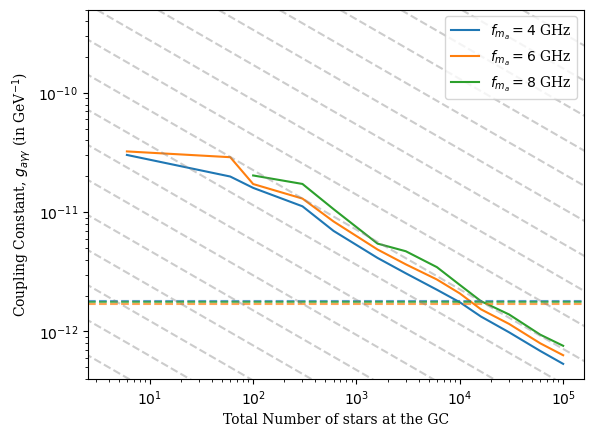

In [59]:
def similarity(A, N):
    return A * np.sqrt(1/N)    

array4GHz = np.array([glim_6[0], glim_60[0], glim_100[0], glim_300[0], glim_600[0], glim_1600[0], glim_3000[0], 
                     glim_6000[0], glim_10000[0], glim_16000[0], glim_30000[0], glim_60000[0], glim_100000[0]])

array6GHz = np.array([glim_6[1], glim_60[1], glim_100[1], glim_300[1], glim_600[1], glim_1600[1], glim_3000[1], 
                     glim_6000[1], glim_10000[1], glim_16000[1], glim_30000[1], glim_60000[1], glim_100000[1]])

array8GHz = np.array([glim_6[2], glim_60[2], glim_100[2], glim_300[2], glim_600[2], glim_1600[2], glim_3000[2], 
                     glim_6000[2], glim_10000[2], glim_16000[2], glim_30000[2], glim_60000[2], glim_100000[2]])

N = [6, 60, 100, 300, 600, 1600, 3000, 6000, 10_000, 16_000, 30_000, 60_000, 100_000]

Xaxis =  10 ** np.linspace(0, 5.5, 1000)

print(len(N), array4GHz.size)
plt.plot(N, array4GHz, label = r"$f_{m_a} = 4$ GHz")
plt.plot(N, array6GHz, label = r"$f_{m_a} = 6$ GHz")
plt.plot(N[2:], array8GHz[2:], label = r"$f_{m_a} = 8$ GHz")

plt.axhline(gayy_lim4_magnetar, color = "C0", ls = "--", alpha = 0.7)
plt.axhline(gayy_lim6_magnetar, color = "C1", ls = "--", alpha = 0.7)
plt.axhline(gayy_lim8_magnetar, color = "C2", ls = "--", alpha = 0.7)

for i in 10**(np.linspace(-7, -12, 18)):
    plt.plot(Xaxis, similarity(i, Xaxis), ls = "--", color = "grey", alpha = 0.4)

plt.xlabel("Total Number of stars at the GC", fontfamily = "serif")
plt.ylabel(r"Coupling Constant, $g_{a\gamma\gamma}$ (in GeV$^{-1}$)", fontfamily = "serif")
plt.legend(loc = 1, prop={'family': "serif"})
plt.yscale("log")
plt.xscale("log")
plt.xlim(10 ** (0.4), 10 ** (5.2))
plt.ylim(10 ** (-12.4), 10 ** (-9.3))
plt.show()

<h3>Stars that contribute significant power for $N = 1600$</h3>

In [60]:
N = 1600
B_new, P_new, alpha_new = catalogue(N)
stars4 = Surface_Element(B_new, P_new, alpha_new, np.zeros((3, N)), np.zeros((3, N)), np.zeros( N), 16.543)
stars6 = Surface_Element(B_new, P_new, alpha_new, np.zeros((3, N)), np.zeros((3, N)), np.zeros( N), 24.814)
stars8 = Surface_Element(B_new, P_new, alpha_new, np.zeros((3, N)), np.zeros((3, N)), np.zeros( N), 33.085)


L4 = stars4.interpolation() * 1.602176634e-19 * (rho_NFW(0.001) / rho_init)
L6 = stars6.interpolation() * 1.602176634e-19 * (rho_NFW(0.001) / rho_init)
L8 = stars8.interpolation() * 1.602176634e-19 * (rho_NFW(0.001) / rho_init)


distance = 8 * 3.086e+19 # m
delta_f = 91.6 * 1e3 #169.1 * 1e3 # Hz

Flux4 = np.sum(L4 / (4 * np.pi * distance * distance * delta_f) * 1e26) # Jy
Flux6 = np.sum(L6 / (4 * np.pi * distance * distance * delta_f) * 1e26) # Jy
Flux8 = np.sum(L8 / (4 * np.pi * distance * distance * delta_f) * 1e26) # Jy

axion_wv4 = (stars4.c*1000) / (4 * 1e9) # m

axion_wv6 = (stars6.c*1000) / (6 * 1e9) # m

axion_wv8 = (stars8.c*1000) / (8 * 1e9) # m

Intensity4 = np.abs(Flux4) / ( np.pi / 4 * (axion_wv4 / 100) * (axion_wv4 / 100) ) # Jy sr^-1
Intensity6 = np.abs(Flux6) / ( np.pi / 4 * (axion_wv6 / 100) * (axion_wv6 / 100) ) # Jy sr^-1
Intensity8 = np.abs(Flux8) / ( np.pi / 4 * (axion_wv8 / 100) * (axion_wv8 / 100) ) # Jy sr^-1


kb = 1.380649e-23 * 1e26 # Jy m^2 K^-1

# System Temperature
Temperature4 = Intensity4 * (axion_wv4**2) / (2 * kb)
Temperature6 = Intensity6 * (axion_wv6**2) / (2 * kb)
Temperature8 = Intensity8 * (axion_wv8**2) / (2 * kb)

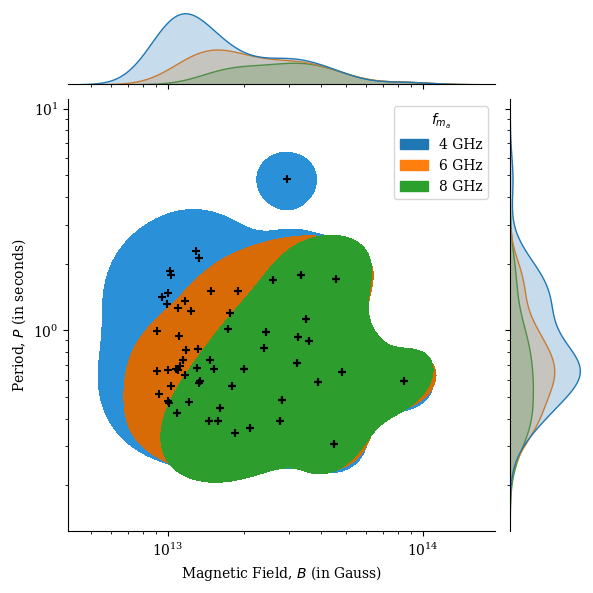

In [61]:
import pandas as pd

delimiter = 1e19 # W

LLL = np.concatenate((L4[L4 > delimiter], L6[L6 > delimiter], L8[L8 > delimiter]))
BBB = np.concatenate((B_new[L4 > delimiter], B_new[L6 > delimiter], B_new[L8 > delimiter]))
PPP = np.concatenate((P_new[L4 > delimiter], P_new[L6 > delimiter], P_new[L8 > delimiter]))
fff = np.concatenate((np.array(["4 GHz"] * L4[L4 > delimiter].size), 
                      np.array(["6 GHz"] * L6[L6 > delimiter].size), 
                      np.array(["8 GHz"] * L8[L8 > delimiter].size)))

data = {r"Magnetic Field, $B$ (in Gauss)": BBB, r"Period, $P$ (in seconds)": PPP, 
        r"Luminosity, $L$ (in W)": LLL, r"$f_{m_a}$": fff}

df = pd.DataFrame(data)

with plt.style.context("default"):
    plt.rcParams["font.family"] = "serif"
    sns.jointplot(data = df, x = r"Magnetic Field, $B$ (in Gauss)", y = r"Period, $P$ (in seconds)", hue = r"$f_{m_a}$", kind = "kde", 
                 n_levels = 2, fill = True, log_scale = 10)
    plt.yticks([0.1, 1, 10] )
    plt.scatter(df[r"Magnetic Field, $B$ (in Gauss)"], df[r"Period, $P$ (in seconds)"], marker = "+", color = "black")

plt.show()

<h1>Chapter 5</h1>

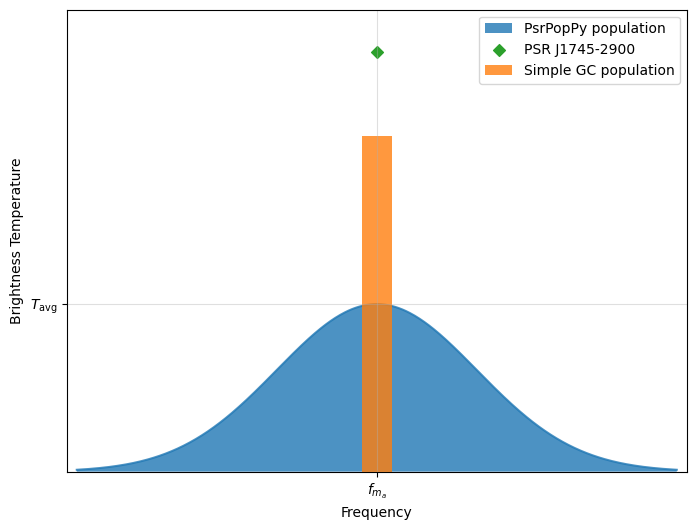

In [62]:
# Summary plot

Xaxis = np.linspace(-3, 3, 500)

fig = plt.figure(figsize = (8, 6))

plt.plot(Xaxis, stats.norm.pdf(Xaxis), alpha = 0.8, zorder = 0)
plt.fill_between(Xaxis, 0, stats.norm.pdf(Xaxis), alpha = 0.8, label = "PsrPopPy population")

plt.bar(0, 0.8, 0.3, zorder = 1, label = "Simple GC population", alpha = 0.8)

plt.scatter(0, 1, marker = "D", label = "PSR J1745-2900")
plt.xticks([0], labels = [r"$f_{m_a}$"])
plt.yticks([0.4], labels = [r"$T_{\rm avg}$"])
plt.xlabel("Frequency")
plt.ylabel("Brightness Temperature")
plt.grid(alpha = 0.4)
plt.xlim(-3.1, 3.1)
plt.ylim(0, 1.1)
plt.legend()

plt.show()